In [1]:
import pandas as pd
import numpy as np
import psycopg2
from datetime import timedelta

%matplotlib inline

con = psycopg2.connect (user = 'postgres',
                password = 'postgres',
                port = '5432',
                
                database = 'inicudb')

cur  = con.cursor()

In [2]:
cur1 = con.cursor()
cur1.execute("SELECT t1.uhid,t1.dischargestatus,t1.birthweight,t1.gestationweekbylmp,t1.gestationdaysbylmp,t1.weight_galevel,t1.central_temp,t1.bp_mean,t1.admissionweight,t1.dateofadmission,t1.timeofadmission  FROM apollo.baby_detail AS t1 WHERE t1.dischargestatus = 'Discharge' OR t1.dischargestatus = 'Death';")
cols1 = list(map(lambda x: x[0], cur1.description))
ds = pd.DataFrame(cur1.fetchall(),columns=cols1)
#ds.sort_values('modificationtime',inplace=True)

In [3]:
def birthweight_correction(x):
    if x<0.6:
        return x * 1000
    elif x<2.0 and x>1.1:
        return x * 1000
    elif x>=2.0 and x<4.0:
        return x * 1000
    else:
        return x

In [4]:
def temp_correction(x):
    if x> 50:
        return 36.5
    else:
        return x

In [5]:
ds.central_temp = ds.central_temp.apply(temp_correction)

In [6]:
ds.birthweight = ds.birthweight.apply(birthweight_correction)

In [7]:
def start_time(x,y):
    try:
        y = str(y)
        if x.split(',')[2] == 'AM':
            return y +" "+ x.split(',')[0] +":"+ x.split(',')[1] + ".000"
        else:
            return str(pd.to_datetime(y +" "+ x.split(',')[0] +":"+ (x.split(',')[1]) + ".000") + timedelta(hours=12))
    except:
        pass

In [8]:
ds['admission_date'] = ds.apply(lambda x: start_time(x['timeofadmission'],x['dateofadmission']),axis=1)

In [9]:
ds.bp_mean = ds.bp_mean.fillna(38.0)

In [10]:
def to_date(x):
    return pd.to_datetime(x)

ds['admission_date'] = ds['admission_date'].apply(to_date)
ds['CRIB_1Hr'] = ds['admission_date'] + timedelta(hours = 12)

In [11]:
uhid = ['0000004042', 'RAMR.0000004016', 'RAMR.0000004821',
       'RJUB.0000015622', 'RNEH.0000008375', 'RNEH.0000011301',
       'RNEH.0000012581', 'RNEH.0000013713', 'RSHI.0000011975',
       'RSHI.0000012005', 'RSHI.0000012088', 'RSHI.0000013287',
       'RSHI.0000013804', 'RSHI.0000014720', 'RSHI.0000015178',
       'RSHI.0000015211', 'RSHI.0000015691', 'RSHI.0000016373',
       'RSHI.0000017471', 'RSHI.0000017472', 'RSHI.0000019707',
       'RSHI.0000021953', 'RSHI.0000023451', 'RSHI.0000025019',
      '0000014821',
'0000017227',
'0000018261',
'0000021745',
'0000028525',
'0000028546',
'0000031306',
'0000031402',
'0000031403',
'0000013967',
'00018290',
'0000014847',
'0000022334',
'023822',
'023868',
'023877',
'023878',
'023880',
'0000024658',
'0000025041',
'028628',
'028629',
'029189',
'032278',
'032338',
'032365',
'032377',
'032392',
'033174',
'033188',
'123456',
'1234567',
'9876543',
'ESHI.0000024559',
'RAMR.0000003268',
'RAMR.0000003764',
'RAMR.0000003954',
'RAMR.0000003966',
'RAMR.0000004033',
'RAMR.0000004059',
'RAMR.0000004070',
'RAMR.0000004115',
'RAMR.0000004131',
'RAMR.0000004176',
'RAMR.0000004189',
'RAMR.0000004206',
'RAMR.0000004239',
'RAMR.0000004292',
'RAMR.0000004336',
'RAMR.0000004399',
'RAMR.0000004424',
'RAMR.0000004452',
'RAMR.0000004703',
'RAMR.0000004844',
'RAMR.0000006362',
'RAMR.0000006714',
'RAMR.0000006731',
'RAMR.0000006977',
'RJAY.0000028039',
'RJAY.0000028144',
'RJAY.0000028308',
'RJAY.0000028396',
'RJAY.0000029065',
'RJAY.0000029243',
'RJAY.0000029244',
'RJAY.0000029266',
'RJAY.0000029476',
'RJAY.0000029521',
'RJAY.0000029528',
'RJAY.0000029529',
'RJAY.0000029553',
'RJAY.0000029554',
'RJAY.0000029566',
'RJAY.0000029574',
'RJAY.0000029591',
'RJAY.0000029638',
'RJAY.0000029651',
'RJAY.0000029666',
'RJAY.0000029719',
'RJAY.0000029839',
'RJAY.0000029860',
'RJAY.0000029866',
'RJAY.0000029881',
'RJAY.0000029922',
'RJAY.0000030003',
'RJAY.0000030025',
'RJAY.0000030040',
'RJAY.0000030120',
'RJAY.0000030211',
'RJAY.0000030249',
'RJAY.0000030339',
'RJAY.0000030359',
'RJAY.0000030368',
'RJAY.0000030371',
'RJAY.0000030561',
'RJAY.0000030562',
'RJAY.0000030671',
'RJAY.0000030680',
'RJAY.0000030702',
'RJAY.0000030715',
'RJAY.0000030759',
'RJAY.0000030760',
'RJAY.0000036124',
'RJAY0000028576',
'RJAY0000028580',
'RJAY000028525',
'RJOR.0000032680',
'RJUB 0000012696',
'RJUB 0000016511',
'RJUB..0000016849',
'RJUB.0000012544',
'RJUB.0000012983',
'RJUB.0000013239',
'RJUB.0000013458',
'RJUB.0000013488',
'RJUB.0000014513',
'RJUB.0000014618',
'RJUB.0000014669',
'RJUB.0000014679',
'RJUB.0000015013',
'RJUB.0000015017',
'RJUB.0000015317',
'RJUB.0000015322',
'RJUB.0000016947',
'RJUB.0000016952',
'RJUB.0000016974',
'RJUB.0000016988',
'RJUB.0000017195',
'RJUB.0000017260',
'RJUB.0000017785',
'RJUB.0000019111',
'RJUB.0000019230',
'RJUB.0000019325',
'RJUB.0000019327',
'RJUB.0000019385',
'RJUB.0000019420',
'RJUB.0000019463',
'RJUB.0000019745',
'RJUB.0000019859',
'RJUB.0000020015',
'RJUB.0000020044',
'RJUB.0000020108',
'RJUB.0000020186',
'RJUB.0000021016',
'RJUB.0000021035',
'RJUB.0000021067',
'RJUB.0000021071',
'RJUB.0000021125',
'RJUB.0000021142',
'RJUB.12475',
'RJUB0000013811',
'RJUB0000017100',
'RJUB0000017369',
'RJUBIPV6945',
'RKO.0000019611',
'RKON.0000008755',
'RKON.0000014915',
'RKON.0000017279',
'RKON.0000017733',
'RKON.0000017734',
'RKON.0000017759',
'RKON.0000017973',
'RKON.0000018142',
'RKON.0000018143',
'RKON.0000018176',
'RKON.0000018210',
'RKON.0000018262',
'RKON.0000018291',
'RKON.0000018392',
'RKON.0000018396',
'RKON.0000019292',
'RKON.0000019303',
'RKON.0000019394',
'RKON.0000019431',
'RKON.0000019611',
'RKON.0000019612',
'RKON.0000019649',
'RKON.0000020024',
'RKON.0000020051',
'RKON.0000020091',
'RKON.0000020308',
'RKON.0000020411',
'RKON.0000020412',
'RKON.0000020521',
'RKON.0000020636',
'RKON.0000020688',
'RKON.0000020708',
'RKON.0000020997',
'RKON.0000021017',
'RKON.0000021025',
'RKON.0000021190',
'RKON.0000021291',
'RKON.0000021550',
'RKON.0000021556',
'RKON.0000021815',
'RKON.0000022165',
'RKON.0000022239',
'RKON.0000023189',
'RKON.0000023340',
'RKON.0000023872',
'RKON.0000024053',
'RKON.0000024189',
'RKON.0000024277',
'RKON.0000024328',
'RKON.0000024367',
'RKON.0000024371',
'RKON.0000024438',
'RKON.0000024444',
'RKON.0000024491',
'RKON.0000024511',
'RKON.0000024718',
'RKON.0000024795',
'RKON.0000024825',
'RKON.0000024874',
'RKON.0000025000',
'RKON.0000026036',
'RKON.0000026046',
'RKON.0000026089',
'RKON.0000026255',
'RKON.0000026463',
'RKON.0000027',
'RKON.0000027048',
'RKON.0000027659',
'RKON.0000027751',
'RKON.0000027788',
'RKON.0000027791',
'RKON.0000028009',
'RKON.0000028026',
'RKON.0000028108',
'RKON.0000028168',
'RKON.0000028169',
'RKON.0000028800',
'RKON.0000029290',
'RKON.0000029370',
'RKON.0000029465',
'RKON.0000029501',
'RKON.0000029502',
'RKON.0000029691',
'RKON.0000029715',
'RKON.0000029742',
'RKON.0000029753',
'RKON.0000029796',
'RKON.0000029837',
'RKON.0000029938',
'RKON.0000029947',
'RKON.0000029948',
'RKON.0000029985',
'RKON.0000030065',
'RKON0000017733',
'RKON0000017734',
'RKON0000018321',
'RKON0000018340',
'RKON0000018625',
'RKON0000018690',
'RKON0000020398',
'RKON0000021017',
'RKON0000023241',
'RKON0000026255',
'RKON:0000021745',
'RKOR.00000029559',
'RKOR.0000027869',
'RKOR.0000028169',
'RKOR.0000028491',
'RKOR.0000028689',
'RKOR.0000028845',
'RKOR.0000028911',
'RKOR.0000029512',
'RKOR.0000029522',
'RKOR.0000029567',
'RKOR.0000029950',
'RKOR.0000029963',
'RKOR.0000029964',
'RKOR.0000029970',
'RKOR.0000029988',
'RKOR.0000030009',
'RKOR.0000030037',
'RKOR.0000030066',
'RKOR.0000030081',
'RKOR.0000030098',
'RKOR.0000030111',
'RKOR.0000030221',
'RKOR.0000030223',
'RKOR.0000030228',
'RKOR.0000030229',
'RKOR.0000030258',
'RKOR.0000030277',
'RKOR.0000030332',
'RKOR.0000030339',
'RKOR.0000030347',
'RKOR.0000030380',
'RKOR.0000030394',
'RKOR.0000030459',
'RKOR.0000030488',
'RKOR.0000030526',
'RKOR.0000030541',
'RKOR.0000030604',
'RKOR.0000030606',
'RKOR.0000030608',
'RKOR.0000030659',
'RKOR.0000030668',
'RKOR.0000030669',
'RKOR.0000030698',
'RKOR.0000030704',
'RKOR.0000030709',
'RKOR.0000030710',
'RKOR.0000030721',
'RKOR.0000030722',
'RKOR.0000030724',
'RKOR.0000030743',
'RKOR.0000030753',
'RKOR.0000030767',
'RKOR.0000030782',
'RKOR.0000030783',
'RKOR.0000030846',
'RKOR.0000030872',
'RKOR.0000030873',
'RKOR.0000030909',
'RKOR.0000030923',
'RKOR.0000030947',
'RKOR.0000030949',
'RKOR.0000030954',
'RKOR.0000030957',
'RKOR.0000030959',
'RKOR.0000030961',
'RKOR.0000030970',
'RKOR.0000030972',
'RKOR.0000030998',
'RKOR.0000031018',
'RKOR.0000031034',
'RKOR.0000031109',
'RKOR.0000031114',
'RKOR.0000031123',
'RKOR.0000031127',
'RKOR.0000031176',
'RKOR.0000031187',
'RKOR.0000031233',
'RKOR.0000031234',
'RKOR.0000031283',
'RKOR.0000031291',
'RKOR.0000031304',
'RKOR.0000031306',
'RKOR.0000031350',
'RKOR.0000031359',
'RKOR.0000031360',
'RKOR.0000031383',
'RKOR.0000031384',
'RKOR.0000031391',
'RKOR.0000031402',
'RKOR.0000031403',
'RKOR.0000031427',
'RKOR.0000031440',
'RKOR.0000031446',
'RKOR.0000031496',
'RKOR.0000031517',
'RKOR.0000031528',
'RKOR.0000031552',
'RKOR.0000031586',
'RKOR.0000031648',
'RKOR.0000031708',
'RKOR.0000031727',
'RKOR.0000031728',
'RKOR.0000031797',
'RKOR.0000032207',
'RKOR.0000032214',
'RKOR.0000032224',
'RKOR.0000032278',
'RKOR.0000032281',
'RKOR.0000032282',
'RKOR.0000032338',
'RKOR.0000032357',
'RKOR.0000032365',
'RKOR.0000032377',
'RKOR.0000032392',
'RKOR.0000032465',
'RKOR.0000032475',
'RKOR.0000032479',
'RKOR.0000032509',
'RKOR.0000032512',
'RKOR.0000032525',
'RKOR.0000032559',
'RKOR.0000032566',
'RKOR.0000032585',
'RKOR.0000032623',
'RKOR.0000032663',
'RKOR.0000032667',
'RKOR.0000032680',
'RKOR.0000032713',
'RKOR.0000032827',
'RKOR.0000032840',
'RKOR.0000032877',
'RKOR.0000032878',
'RKOR.0000032894',
'RKOR.0000032950',
'RKOR.0000032951',
'RKOR.0000032972',
'RKOR.0000032973',
'RKOR.0000033063',
'RKOR.0000033065',
'RKOR.0000033076',
'RKOR.0000033085',
'RKOR.0000033112',
'RKOR.0000033156',
'RKOR.0000033173',
'RKOR.0000033183',
'RKOR.0000033184',
'RKOR.0000033186',
'RKOR.0000033188',
'RKOR.0000033273',
'RKOR.0000033276',
'RKOR.0000033417',
'RKOR.0000033452',
'RKOR.0000033456',
'RKOR.0000033562',
'RKOR.0000033566',
'RKOR.0000033582',
'RKOR.0000033590',
'RKOR.0000033602',
'RKOR.0000033651',
'RKOR.0000033674',
'RKOR.0000033709',
'RKOR.0000033710',
'RKOR.0000033746',
'RKOR.0000033797',
'RKOR.0000033815',
'RKOR.0000033836',
'RKOR.0000033969',
'RKOR0000029558',
'RKORIPV15514',
'RKORIPV15515',
'RKOn.0000018143',
'RKOn.0000018759',
'RMAR.0000',
'RMAR.00000',
'RMAR.0000022048',
'RMAR.0000022170',
'RMAR.0000022230',
'RMAR.0000022413',
'RMAR.0000023461',
'RMAR.0000023462',
'RMAR.0000023788',
'RMAR.0000023945',
'RMAR.0000024348',
'RMAR.0000025204',
'RMAR.0000025277',
'RMAR.0000025325',
'RMAR.0000025337',
'RMAR.0000025350',
'RMAR.0000025351',
'RMAR.0000025384',
'RMAR.0000025432',
'RMAR.0000025445',
'RMAR.0000025448',
'RMAR.0000025479',
'RMAR.0000025482',
'RMAR.0000025487',
'RMAR.0000025566',
'RMAR.0000025578',
'RMAR.0000025675',
'RMAR.0000025712',
'RMAR.0000025715',
'RMAR.0000025728',
'RMAR.0000025834',
'RMAR.0000025882',
'RMAR.0000025883',
'RMAR.0000025892',
'RMAR.0000025953',
'RMAR.0000025961',
'RMAR.0000026483',
'RMAR.0000026533',
'RMAR.0000026549',
'RMAR.0000026636',
'RMAR.0000026647',
'RMAR.0000026672',
'RMAR.0000026673',
'RMAR.0000026725',
'RMAR.0000026834',
'RMAR.0000026956',
'RMAR.0000026969',
'RMAR.0000027003',
'RMAR.0000027016',
'RMAR.0000027018',
'RMAR.0000027744',
'RMAR.0000028112',
'RMAR.0000028207',
'RMAR.0000028218',
'RMAR.0000028284',
'RMAR.0000028394',
'RMAR.0000028763',
'RMAR.0000028952.',
'RMAR.0000029028',
'RMAR.0000029163',
'RMAR.0000029527.',
'RMAR.0000029654',
'RMAR.0000029888',
'RMAR.0000030319',
'RMAR.0000030323',
'RMAR.0000030485',
'RMAR.0000031936',
'RMAR.0000032045',
'RMAR.0000032463',
'RMAR.0000032787',
'RMAR.0000033452',
'RMAR.0000033532',
'RMAR.0000034214',
'RMAR.0000034257',
'RMAR.0000034365',
'RMAR.0000034393',
'RMAR.0000034414',
'RMAR.0000034697',
'RMAR.0000034706',
'RMAR.0000035245',
'RMAR.0000035444',
'RMAR.0000035545',
'RMAR.0000036124',
'RMAR.0000036240',
'RMAR.0000036457',
'RMAR.0000037457',
'RMAR.0000037719',
'RMAR.28653',
'RMAR0000030354',
'RMAR0000033311',
'RMAR0000034160',
'RMAR0000034287',
'RMAR0000035216',
'RMAR0000035245',
'RMAR0000035598',
'RMAR0000036253',
'RNEH.0000008001',
'RNEH.0000008002',
'RNEH.0000008033',
'RNEH.0000008114',
'RNEH.0000008203',
'RNEH.0000008204',
'RNEH.0000008223',
'RNEH.0000008291',
'RNEH.0000008302',
'RNEH.0000008351',
'RNEH.0000008377',
'RNEH.0000008463',
'RNEH.0000008465',
'RNEH.0000008973',
'RNEH.0000009026',
'RNEH.0000009029',
'RNEH.0000009034',
'RNEH.0000009061',
'RNEH.0000009145',
'RNEH.0000009161',
'RNEH.0000009213',
'RNEH.0000009215',
'RNEH.0000009255',
'RNEH.0000009259',
'RNEH.0000009286',
'RNEH.0000009308',
'RNEH.0000009364',
'RNEH.0000009374',
'RNEH.0000009387',
'RNEH.0000009424',
'RNEH.0000009495',
'RNEH.0000009497',
'RNEH.0000009510',
'RNEH.0000009511',
'RNEH.0000009541',
'RNEH.0000009542',
'RNEH.0000009579',
'RNEH.0000009580',
'RNEH.0000009584',
'RNEH.0000009594',
'RNEH.0000009600',
'RNEH.0000009619',
'RNEH.0000009621',
'RNEH.0000009640',
'RNEH.0000009642',
'RNEH.0000009643',
'RNEH.0000009674',
'RNEH.0000009725',
'RNEH.0000009758',
'RNEH.0000009759',
'RNEH.0000009768',
'RNEH.0000009782',
'RNEH.0000009809',
'RNEH.0000009810',
'RNEH.0000009811',
'RNEH.0000009831',
'RNEH.0000009915',
'RNEH.0000009918',
'RNEH.0000009919',
'RNEH.0000009924',
'RNEH.0000009996',
'RNEH.0000010008',
'RNEH.0000010025',
'RNEH.0000010038',
'RNEH.0000010180',
'RNEH.0000010181',
'RNEH.0000010204',
'RNEH.0000010208',
'RNEH.0000010271',
'RNEH.0000010366',
'RNEH.0000010373',
'RNEH.0000010401',
'RNEH.0000010413',
'RNEH.0000010414',
'RNEH.0000010430',
'RNEH.0000010431',
'RNEH.0000010432',
'RNEH.0000010460',
'RNEH.0000010466',
'RNEH.0000010483',
'RNEH.0000010518',
'RNEH.0000010531',
'RNEH.0000010533',
'RNEH.0000010546',
'RNEH.0000010548',
'RNEH.0000010581',
'RNEH.0000010601',
'RNEH.0000010631',
'RNEH.0000010637',
'RNEH.0000010679',
'RNEH.0000010694',
'RNEH.0000010724',
'RNEH.0000010725',
'RNEH.0000010738',
'RNEH.0000010769',
'RNEH.0000010783',
'RNEH.0000010784',
'RNEH.0000010807',
'RNEH.0000010849',
'RNEH.0000010900',
'RNEH.0000010901',
'RNEH.0000010916',
'RNEH.0000010921',
'RNEH.0000010929',
'RNEH.0000010930',
'RNEH.0000010962',
'RNEH.0000010984',
'RNEH.0000010990',
'RNEH.0000010998',
'RNEH.0000010999',
'RNEH.0000011138',
'RNEH.0000011143',
'RNEH.0000011190',
'RNEH.0000011211',
'RNEH.0000011229',
'RNEH.0000011260',
'RNEH.0000011300',
'RNEH.0000011313',
'RNEH.0000011335',
'RNEH.0000011404',
'RNEH.0000011410',
'RNEH.0000011571',
'RNEH.0000011572',
'RNEH.0000011614',
'RNEH.0000011679',
'RNEH.0000011749',
'RNEH.0000011769',
'RNEH.0000011784',
'RNEH.0000011788',
'RNEH.0000011822',
'RNEH.0000011823',
'RNEH.0000011824',
'RNEH.0000011834',
'RNEH.0000011837',
'RNEH.0000011876',
'RNEH.0000011886',
'RNEH.0000011916',
'RNEH.0000011967',
'RNEH.0000011968',
'RNEH.0000012022',
'RNEH.0000012078',
'RNEH.0000012079',
'RNEH.0000012137',
'RNEH.0000012232',
'RNEH.0000012246',
'RNEH.0000012254',
'RNEH.0000012273',
'RNEH.0000012304',
'RNEH.0000012325',
'RNEH.0000012326',
'RNEH.0000012370',
'RNEH.0000012957',
'RNEH.0000013016',
'RNEH.0000013035',
'RNEH.0000013044',
'RNEH.0000013059',
'RNEH.0000013131',
'RNEH.0000013157',
'RNEH.0000013174',
'RNEH.0000013188',
'RNEH.0000013236',
'RNEH.0000013244',
'RNEH.0000013396',
'RNEH.0000013403',
'RNEH.0000013622',
'RNEH.0000013623',
'RNEH.0000013640',
'RNEH.0000013707',
'RNEH.0000013716',
'RNEH.0000013742',
'RNEH.0000013743',
'RNEH.0000013772',
'RNEH.0000013795',
'RNEH.0000013808',
'RNEH.0000013810',
'RNEH.0000013902',
'RNEH.0000013947',
'RNEH.0000013973',
'RNEH.0000013990',
'RNEH.0000014021',
'RNEH.0000014035',
'RNEH.0000014063',
'RNEH.0000014283',
'RNEH.0000014284',
'RNEH.0000014297',
'RNEH.0000014315',
'RNEH.0000014351',
'RNEH.0000014361',
'RNEH.0000014375',
'RNEH.0000014467',
'RNEH.0000014468',
'RNEH.0000014469',
'RNEH.0000014474',
'RNEH.0000014491',
'RNEH.0000014500',
'RNEH.0000014505',
'RNEH.0000014519',
'RNEH.0000014520',
'RNEH.0000014549',
'RNEH.0000014594',
'RNEH.0000014612',
'RNEH.0000014647',
'RNEH.0000014660',
'RNEH.0000014661',
'RNEH.0000014666',
'RNEH.0000014668',
'RNEH.0000014721',
'RNEH.0000014736',
'RNEH.0000014738',
'RNEH.0000014739',
'RNEH.0000014800',
'RNEH.0000014853',
'RNEH0000008156',
'RNEH0000008223',
'RSHI.00000024318',
'RSHI.00000024413',
'RSHI.00000024541',
'RSHI.0000007129',
'RSHI.0000011120',
'RSHI.0000011571',
'RSHI.0000011572',
'RSHI.0000011574',
'RSHI.0000011857',
'RSHI.0000011935',
'RSHI.0000011941',
'RSHI.0000011942',
'RSHI.0000011952',
'RSHI.0000011964',
'RSHI.0000011969',
'RSHI.0000011971',
'RSHI.0000011976',
'RSHI.0000011988',
'RSHI.0000011990',
'RSHI.0000011992',
'RSHI.0000011993',
'RSHI.0000012002',
'RSHI.0000012003',
'RSHI.0000012004',
'RSHI.0000012041',
'RSHI.0000012050',
'RSHI.0000012072',
'RSHI.0000012073',
'RSHI.0000012083',
'RSHI.0000012087',
'RSHI.0000012100',
'RSHI.0000012152',
'RSHI.0000012200',
'RSHI.0000012214',
'RSHI.0000012235',
'RSHI.0000012260',
'RSHI.0000012261',
'RSHI.0000012276',
'RSHI.0000012306',
'RSHI.0000012308',
'RSHI.0000012314',
'RSHI.0000012315',
'RSHI.0000012316',
'RSHI.0000012317',
'RSHI.0000012325',
'RSHI.0000012361',
'RSHI.0000012362',
'RSHI.0000012386',
'RSHI.0000012387',
'RSHI.0000012388',
'RSHI.0000012436',
'RSHI.0000012451',
'RSHI.0000012505',
'RSHI.0000012538',
'RSHI.0000012587',
'RSHI.0000012600',
'RSHI.0000012602',
'RSHI.0000012661',
'RSHI.0000012702',
'RSHI.0000012715',
'RSHI.0000012743',
'RSHI.0000012772',
'RSHI.0000012789',
'RSHI.0000012803',
'RSHI.0000012827',
'RSHI.0000012828',
'RSHI.0000012830',
'RSHI.0000012831',
'RSHI.0000012850',
'RSHI.0000012851',
'RSHI.0000012865',
'RSHI.0000012903',
'RSHI.0000012924',
'RSHI.0000012925',
'RSHI.0000012962',
'RSHI.0000012964',
'RSHI.0000012965',
'RSHI.0000012966',
'RSHI.0000012969',
'RSHI.0000012984',
'RSHI.0000012985',
'RSHI.0000012988',
'RSHI.0000013011',
'RSHI.0000013024',
'RSHI.0000013025',
'RSHI.0000013030',
'RSHI.0000013036',
'RSHI.0000013061',
'RSHI.0000013066',
'RSHI.0000013162',
'RSHI.0000013163',
'RSHI.0000013188',
'RSHI.0000013252',
'RSHI.0000013253',
'RSHI.0000013263',
'RSHI.0000013264',
'RSHI.0000013266',
'RSHI.0000013272',
'RSHI.0000013288',
'RSHI.0000013298',
'RSHI.0000013299',
'RSHI.0000013331',
'RSHI.0000013377',
'RSHI.0000013379',
'RSHI.0000013390',
'RSHI.0000013392',
'RSHI.0000013446',
'RSHI.0000013576',
'RSHI.0000013579',
'RSHI.0000013614',
'RSHI.0000013617',
'RSHI.0000013631',
'RSHI.0000013652',
'RSHI.0000013699',
'RSHI.0000013701',
'RSHI.0000013718',
'RSHI.0000013747',
'RSHI.0000013800',
'RSHI.0000013807',
'RSHI.0000013824',
'RSHI.0000013826',
'RSHI.0000013841',
'RSHI.0000013907',
'RSHI.0000013938',
'RSHI.0000013961',
'RSHI.0000013995',
'RSHI.0000013998',
'RSHI.0000014044',
'RSHI.0000014054',
'RSHI.0000014097',
'RSHI.0000014103',
'RSHI.0000014177',
'RSHI.0000014191',
'RSHI.0000014195',
'RSHI.0000014196',
'RSHI.0000014205',
'RSHI.0000014215',
'RSHI.0000014218',
'RSHI.0000014239',
'RSHI.0000014240',
'RSHI.0000014244',
'RSHI.0000014261',
'RSHI.0000014262',
'RSHI.0000014264',
'RSHI.0000014265',
'RSHI.0000014267',
'RSHI.0000014268',
'RSHI.0000014285',
'RSHI.0000014297',
'RSHI.0000014306',
'RSHI.0000014313',
'RSHI.0000014318',
'RSHI.0000014320',
'RSHI.0000014325',
'RSHI.0000014327',
'RSHI.0000014330',
'RSHI.0000014331',
'RSHI.0000014366',
'RSHI.0000014367',
'RSHI.0000014368',
'RSHI.0000014371',
'RSHI.0000014378',
'RSHI.0000014389',
'RSHI.0000014399',
'RSHI.0000014400',
'RSHI.0000014407',
'RSHI.0000014433',
'RSHI.0000014442',
'RSHI.0000014456',
'RSHI.0000014457',
'RSHI.0000014463',
'RSHI.0000014468',
'RSHI.0000014472',
'RSHI.0000014497',
'RSHI.0000014510',
'RSHI.0000014511',
'RSHI.0000014517',
'RSHI.0000014530',
'RSHI.0000014575',
'RSHI.0000014580',
'RSHI.0000014592',
'RSHI.0000014628',
'RSHI.0000014648',
'RSHI.0000014664',
'RSHI.0000014665',
'RSHI.0000014666',
'RSHI.0000014677',
'RSHI.0000014687',
'RSHI.0000014688',
'RSHI.0000014691',
'RSHI.0000014694',
'RSHI.0000014695',
'RSHI.0000014699',
'RSHI.0000014716',
'RSHI.0000014719',
'RSHI.0000014730',
'RSHI.0000014731',
'RSHI.0000014736',
'RSHI.0000014844',
'RSHI.0000014845',
'RSHI.0000014848',
'RSHI.0000014859',
'RSHI.0000014883',
'RSHI.0000014884',
'RSHI.0000014898',
'RSHI.0000014902',
'RSHI.0000014904',
'RSHI.0000014908',
'RSHI.0000014911',
'RSHI.0000014932',
'RSHI.0000014933',
'RSHI.0000014934',
'RSHI.0000014935',
'RSHI.0000014949',
'RSHI.0000014962',
'RSHI.0000014969',
'RSHI.0000014975',
'RSHI.0000014999',
'RSHI.0000015000',
'RSHI.0000015014',
'RSHI.0000015015',
'RSHI.0000015043',
'RSHI.0000015054',
'RSHI.0000015057',
'RSHI.0000015058',
'RSHI.0000015065',
'RSHI.0000015066',
'RSHI.0000015104',
'RSHI.0000015117',
'RSHI.0000015118',
'RSHI.0000015134',
'RSHI.0000015136',
'RSHI.0000015137',
'RSHI.0000015140',
'RSHI.0000015141',
'RSHI.0000015144',
'RSHI.0000015173',
'RSHI.0000015179',
'RSHI.0000015187',
'RSHI.0000015209',
'RSHI.0000015212',
'RSHI.0000015213',
'RSHI.0000015231',
'RSHI.0000015281',
'RSHI.0000015284',
'RSHI.0000015297',
'RSHI.0000015331',
'RSHI.0000015336',
'RSHI.0000015402',
'RSHI.0000015415',
'RSHI.0000015420',
'RSHI.0000015449',
'RSHI.0000015458',
'RSHI.0000015459',
'RSHI.0000015482',
'RSHI.0000015491',
'RSHI.0000015492',
'RSHI.0000015493',
'RSHI.0000015522',
'RSHI.0000015540',
'RSHI.0000015541',
'RSHI.0000015552',
'RSHI.0000015561',
'RSHI.0000015581',
'RSHI.0000015582',
'RSHI.0000015585',
'RSHI.0000015613',
'RSHI.0000015614',
'RSHI.0000015643',
'RSHI.0000015661',
'RSHI.0000015663',
'RSHI.0000015668',
'RSHI.0000015736',
'RSHI.0000015737',
'RSHI.0000015741',
'RSHI.0000015772',
'RSHI.0000015793',
'RSHI.0000015809',
'RSHI.0000015810',
'RSHI.0000015868',
'RSHI.0000015873',
'RSHI.0000015883',
'RSHI.0000015920',
'RSHI.0000015938',
'RSHI.0000015959',
'RSHI.0000015960',
'RSHI.0000015961',
'RSHI.0000015979',
'RSHI.0000016050',
'RSHI.0000016084',
'RSHI.0000016112',
'RSHI.0000016137',
'RSHI.0000016142',
'RSHI.0000016147',
'RSHI.0000016148',
'RSHI.0000016149',
'RSHI.0000016185',
'RSHI.0000016193',
'RSHI.0000016194',
'RSHI.0000016281',
'RSHI.0000016283',
'RSHI.0000016285',
'RSHI.0000016291',
'RSHI.0000016292',
'RSHI.0000016315',
'RSHI.0000016316',
'RSHI.0000016323',
'RSHI.0000016325',
'RSHI.0000016326',
'RSHI.0000016330',
'RSHI.0000016343',
'RSHI.0000016344',
'RSHI.0000016365',
'RSHI.0000016388',
'RSHI.0000016395',
'RSHI.0000016434',
'RSHI.0000016453',
'RSHI.0000016454',
'RSHI.0000016460',
'RSHI.0000016502',
'RSHI.0000016503',
'RSHI.0000016511',
'RSHI.0000016520',
'RSHI.0000016530',
'RSHI.0000016535',
'RSHI.0000016564',
'RSHI.0000016565',
'RSHI.0000016595',
'RSHI.0000016604',
'RSHI.0000016623',
'RSHI.0000016647',
'RSHI.0000016651',
'RSHI.0000016665',
'RSHI.0000016666',
'RSHI.0000016669',
'RSHI.0000016689',
'RSHI.0000016705',
'RSHI.0000016706',
'RSHI.0000016765',
'RSHI.0000016766',
'RSHI.0000016771',
'RSHI.0000016772',
'RSHI.0000016773',
'RSHI.0000016774',
'RSHI.0000016790',
'RSHI.0000016832',
'RSHI.0000016836',
'RSHI.0000016859',
'RSHI.0000016863',
'RSHI.0000016872',
'RSHI.0000016893',
'RSHI.0000016924',
'RSHI.0000016935',
'RSHI.0000016943',
'RSHI.0000016969',
'RSHI.0000016970',
'RSHI.0000017047',
'RSHI.0000017056',
'RSHI.0000017057',
'RSHI.0000017091',
'RSHI.0000017094',
'RSHI.0000017129',
'RSHI.0000017143',
'RSHI.0000017210',
'RSHI.0000017306',
'RSHI.0000017376',
'RSHI.0000017430',
'RSHI.0000017431',
'RSHI.0000017466',
'RSHI.0000017474',
'RSHI.0000017512',
'RSHI.0000017547',
'RSHI.0000017562',
'RSHI.0000017577',
'RSHI.0000017602',
'RSHI.0000017603',
'RSHI.0000017623',
'RSHI.0000017624',
'RSHI.0000017634',
'RSHI.0000017640',
'RSHI.0000017641',
'RSHI.0000017651',
'RSHI.0000017652',
'RSHI.0000017681',
'RSHI.0000017692',
'RSHI.0000017734',
'RSHI.0000017762',
'RSHI.0000017763',
'RSHI.0000017787',
'RSHI.0000017800',
'RSHI.0000017817',
'RSHI.0000017866',
'RSHI.0000017874',
'RSHI.0000017888',
'RSHI.0000017893',
'RSHI.0000017909',
'RSHI.0000017917',
'RSHI.0000017918',
'RSHI.0000017919',
'RSHI.0000017931',
'RSHI.0000017951',
'RSHI.0000017956',
'RSHI.0000017981',
'RSHI.0000018006',
'RSHI.0000018016',
'RSHI.0000018050',
'RSHI.0000018051',
'RSHI.0000018080',
'RSHI.0000018082',
'RSHI.0000018095',
'RSHI.0000018114',
'RSHI.0000018136',
'RSHI.0000018151',
'RSHI.0000018152',
'RSHI.0000018153',
'RSHI.0000018162',
'RSHI.0000018206',
'RSHI.0000018207',
'RSHI.0000018209',
'RSHI.0000018215',
'RSHI.0000018232',
'RSHI.0000018289',
'RSHI.0000018310',
'RSHI.0000018312',
'RSHI.0000018314',
'RSHI.0000018357',
'RSHI.0000018379',
'RSHI.0000018381',
'RSHI.0000018383',
'RSHI.0000018384',
'RSHI.0000018391',
'RSHI.0000018392',
'RSHI.0000018438',
'RSHI.0000018456',
'RSHI.0000018457',
'RSHI.0000018468',
'RSHI.0000018523',
'RSHI.0000018537',
'RSHI.0000018554',
'RSHI.0000018556',
'RSHI.0000018584',
'RSHI.0000018598',
'RSHI.0000018600',
'RSHI.0000018646',
'RSHI.0000018668',
'RSHI.0000018687',
'RSHI.0000018698',
'RSHI.0000018734',
'RSHI.0000018749',
'RSHI.0000018757',
'RSHI.0000018771',
'RSHI.0000018789',
'RSHI.0000018812',
'RSHI.0000018830',
'RSHI.0000018836',
'RSHI.0000018896',
'RSHI.0000018899',
'RSHI.0000018903',
'RSHI.0000018904',
'RSHI.0000018967',
'RSHI.0000018972',
'RSHI.0000018973',
'RSHI.0000018975',
'RSHI.0000018977',
'RSHI.0000019011',
'RSHI.0000019030',
'RSHI.0000019056',
'RSHI.0000019088',
'RSHI.0000019089',
'RSHI.0000019134',
'RSHI.0000019142',
'RSHI.0000019145',
'RSHI.0000019147',
'RSHI.0000019149',
'RSHI.0000019151',
'RSHI.0000019171',
'RSHI.0000019172',
'RSHI.0000019186',
'RSHI.0000019213',
'RSHI.0000019298',
'RSHI.0000019414',
'RSHI.0000019415',
'RSHI.0000019422',
'RSHI.0000019423',
'RSHI.0000019435',
'RSHI.0000019458',
'RSHI.0000019463',
'RSHI.0000019468',
'RSHI.0000019495',
'RSHI.0000019496',
'RSHI.0000019518',
'RSHI.0000019528',
'RSHI.0000019545',
'RSHI.0000019546',
'RSHI.0000019552',
'RSHI.0000019560',
'RSHI.0000019579',
'RSHI.0000019580',
'RSHI.0000019611',
'RSHI.0000019631',
'RSHI.0000019640',
'RSHI.0000019646',
'RSHI.0000019654',
'RSHI.0000019662',
'RSHI.0000019692',
'RSHI.0000019740',
'RSHI.0000019757',
'RSHI.0000019760',
'RSHI.0000019761',
'RSHI.0000019772',
'RSHI.0000019785',
'RSHI.0000019799',
'RSHI.0000019802',
'RSHI.0000019805',
'RSHI.000001984',
'RSHI.0000019841',
'RSHI.0000019842',
'RSHI.0000019849',
'RSHI.0000019884',
'RSHI.0000019885',
'RSHI.0000019886',
'RSHI.0000019890',
'RSHI.0000019900',
'RSHI.0000019909',
'RSHI.0000019921',
'RSHI.0000019932',
'RSHI.0000019933',
'RSHI.0000019943',
'RSHI.0000019945',
'RSHI.0000019947',
'RSHI.0000019951',
'RSHI.0000019960',
'RSHI.0000019985',
'RSHI.0000019993',
'RSHI.0000019996',
'RSHI.0000020',
'RSHI.0000020010',
'RSHI.0000020020',
'RSHI.0000020028',
'RSHI.0000020032',
'RSHI.0000020034',
'RSHI.0000020035',
'RSHI.0000020039',
'RSHI.0000020045',
'RSHI.0000020046',
'RSHI.0000020048',
'RSHI.0000020049',
'RSHI.0000020056',
'RSHI.0000020069',
'RSHI.0000020092',
'RSHI.0000020096',
'RSHI.0000020122',
'RSHI.0000020126',
'RSHI.0000020134',
'RSHI.0000020146',
'RSHI.0000020169',
'RSHI.0000020191',
'RSHI.0000020197',
'RSHI.0000020205',
'RSHI.0000020206',
'RSHI.0000020226',
'RSHI.0000020241',
'RSHI.0000020242',
'RSHI.0000020251',
'RSHI.0000020252',
'RSHI.0000020276',
'RSHI.0000020294',
'RSHI.0000020326',
'RSHI.0000020345',
'RSHI.0000020346',
'RSHI.0000020363',
'RSHI.0000020376',
'RSHI.0000020401',
'RSHI.0000020406',
'RSHI.0000020416',
'RSHI.0000020420',
'RSHI.0000020432',
'RSHI.0000020452',
'RSHI.0000020456',
'RSHI.0000020507',
'RSHI.0000020524',
'RSHI.0000020534',
'RSHI.0000020538',
'RSHI.0000020539',
'RSHI.0000020554',
'RSHI.0000020556',
'RSHI.0000020572',
'RSHI.0000020574',
'RSHI.0000020600',
'RSHI.0000020601',
'RSHI.0000020604',
'RSHI.0000020606',
'RSHI.0000020614',
'RSHI.0000020704',
'RSHI.0000020724',
'RSHI.0000020741',
'RSHI.0000020758',
'RSHI.0000020760',
'RSHI.0000020766',
'RSHI.0000020774',
'RSHI.0000020779',
'RSHI.0000020805',
'RSHI.0000020806',
'RSHI.0000020858',
'RSHI.0000020872',
'RSHI.0000020900',
'RSHI.0000020930',
'RSHI.0000021001',
'RSHI.0000021004',
'RSHI.0000021024',
'RSHI.0000021037',
'RSHI.0000021051',
'RSHI.0000021067',
'RSHI.0000021068',
'RSHI.0000021071',
'RSHI.0000021107',
'RSHI.0000021161',
'RSHI.0000021218',
'RSHI.0000021224',
'RSHI.0000021244',
'RSHI.0000021284',
'RSHI.0000021301',
'RSHI.0000021305',
'RSHI.0000021306',
'RSHI.0000021307',
'RSHI.0000021320',
'RSHI.0000021321',
'RSHI.0000021329',
'RSHI.0000021367',
'RSHI.0000021398',
'RSHI.0000021521',
'RSHI.0000021556',
'RSHI.0000021579',
'RSHI.0000021586',
'RSHI.0000021634',
'RSHI.0000021779',
'RSHI.0000021806',
'RSHI.0000021807',
'RSHI.0000021832',
'RSHI.0000021833',
'RSHI.0000021834',
'RSHI.0000021841',
'RSHI.0000021856',
'RSHI.0000021866',
'RSHI.0000021870',
'RSHI.0000021888',
'RSHI.0000021910',
'RSHI.0000021977',
'RSHI.0000021999',
'RSHI.0000022000',
'RSHI.0000022040',
'RSHI.0000022051',
'RSHI.0000022054',
'RSHI.0000022064',
'RSHI.0000022092',
'RSHI.0000022093',
'RSHI.0000022108',
'RSHI.0000022117',
'RSHI.0000022118',
'RSHI.0000022132',
'RSHI.0000022137',
'RSHI.0000022144',
'RSHI.0000022203',
'RSHI.0000022204',
'RSHI.0000022214',
'RSHI.0000022215',
'RSHI.0000022234',
'RSHI.0000022235',
'RSHI.0000022240',
'RSHI.0000022270',
'RSHI.0000022277',
'RSHI.0000022302',
'RSHI.0000022306',
'RSHI.0000022307',
'RSHI.0000022313',
'RSHI.0000022314',
'RSHI.0000022318',
'RSHI.0000022327',
'RSHI.0000022328',
'RSHI.0000022335',
'RSHI.0000022346',
'RSHI.0000022355',
'RSHI.0000022399',
'RSHI.0000022404',
'RSHI.0000022436',
'RSHI.0000022450',
'RSHI.0000022461',
'RSHI.0000022469',
'RSHI.0000022472',
'RSHI.0000022479',
'RSHI.0000022489',
'RSHI.0000022514',
'RSHI.0000022525',
'RSHI.0000022526',
'RSHI.0000022527',
'RSHI.0000022529',
'RSHI.0000022541',
'RSHI.0000022553',
'RSHI.0000022564',
'RSHI.0000022599',
'RSHI.0000022615',
'RSHI.0000022621',
'RSHI.0000022623',
'RSHI.0000022632',
'RSHI.0000022645',
'RSHI.0000022660',
'RSHI.0000022665',
'RSHI.0000022682',
'RSHI.0000022683',
'RSHI.0000022710',
'RSHI.0000022718',
'RSHI.0000022732',
'RSHI.0000022735',
'RSHI.0000022761',
'RSHI.0000022773',
'RSHI.0000022786',
'RSHI.0000022808',
'RSHI.0000022830',
'RSHI.0000022834',
'RSHI.0000022848',
'RSHI.0000022849',
'RSHI.0000022850',
'RSHI.0000022854',
'RSHI.0000022867',
'RSHI.0000022871',
'RSHI.0000022880',
'RSHI.0000022896',
'RSHI.0000022953',
'RSHI.0000022954',
'RSHI.0000022970',
'RSHI.0000022971',
'RSHI.0000022975',
'RSHI.0000022976',
'RSHI.0000022978',
'RSHI.0000023049',
'RSHI.0000023050',
'RSHI.0000023057',
'RSHI.0000023059',
'RSHI.0000023083',
'RSHI.0000023088',
'RSHI.0000023115',
'RSHI.0000023122',
'RSHI.0000023173',
'RSHI.0000023174',
'RSHI.0000023176',
'RSHI.0000023179',
'RSHI.0000023186',
'RSHI.0000023193',
'RSHI.0000023202',
'RSHI.0000023222',
'RSHI.0000023223',
'RSHI.0000023241',
'RSHI.0000023255',
'RSHI.0000023268',
'RSHI.0000023334',
'RSHI.0000023343',
'RSHI.0000023390',
'RSHI.0000023417',
'RSHI.0000023418',
'RSHI.0000023452',
'RSHI.0000023460',
'RSHI.0000023490',
'RSHI.0000023500',
'RSHI.0000023527',
'RSHI.0000023554',
'RSHI.0000023674',
'RSHI.0000023724',
'RSHI.0000023754',
'RSHI.0000023765',
'RSHI.0000023766',
'RSHI.0000023771',
'RSHI.0000023776',
'RSHI.0000023777',
'RSHI.0000023780',
'RSHI.0000023786',
'RSHI.0000023787',
'RSHI.0000023788',
'RSHI.0000023789',
'RSHI.0000023842',
'RSHI.0000023843',
'RSHI.0000023852',
'RSHI.0000023907',
'RSHI.0000023949',
'RSHI.0000023956',
'RSHI.0000024035',
'RSHI.0000024036',
'RSHI.0000024065',
'RSHI.0000024069',
'RSHI.0000024070',
'RSHI.0000024071',
'RSHI.0000024076',
'RSHI.0000024092',
'RSHI.0000024094',
'RSHI.0000024185',
'RSHI.0000024186',
'RSHI.0000024258',
'RSHI.0000024263',
'RSHI.0000024315',
'RSHI.0000024316',
'RSHI.0000024318',
'RSHI.0000024369',
'RSHI.0000024405',
'RSHI.0000024406',
'RSHI.0000024409',
'RSHI.0000024413',
'RSHI.0000024418',
'RSHI.0000024435',
'RSHI.0000024464',
'RSHI.0000024467',
'RSHI.0000024482',
'RSHI.0000024493',
'RSHI.0000024495',
'RSHI.0000024501',
'RSHI.0000024531',
'RSHI.0000024533',
'RSHI.0000024534',
'RSHI.0000024538',
'RSHI.0000024559',
'RSHI.0000024581',
'RSHI.0000024607',
'RSHI.0000024608',
'RSHI.0000024640',
'RSHI.0000024641',
'RSHI.0000024651',
'RSHI.0000024652',
'RSHI.0000024658',
'RSHI.0000024689',
'RSHI.0000024690',
'RSHI.0000024697',
'RSHI.0000024700',
'RSHI.0000024720',
'RSHI.0000024733',
'RSHI.0000024818',
'RSHI.0000024844',
'RSHI.0000024845',
'RSHI.0000024854',
'RSHI.0000024875',
'RSHI.0000024877',
'RSHI.0000024882',
'RSHI.0000024884',
'RSHI.0000024885',
'RSHI.0000024901',
'RSHI.0000024958',
'RSHI.0000025014',
'RSHI.0000025025',
'RSHI.0000025026',
'RSHI.0000025045',
'RSHI.0000025088',
'RSHI.0000025089',
'RSHI.0000025104',
'RSHI.0000025109',
'RSHI.0000025165',
'RSHI.0000025173',
'RSHI.0000025207',
'RSHI.0000025210',
'RSHI.0000025218',
'RSHI.0000025219',
'RSHI.0000025226',
'RSHI.0000025274',
'RSHI.0000025285',
'RSHI.0000025321',
'RSHI.0000025334',
'RSHI.0000025344',
'RSHI.0000025366',
'RSHI.0000025368',
'RSHI.0000025386',
'RSHI.0000025397',
'RSHI.0000025413',
'RSHI.0000025461',
'RSHI.0000025476',
'RSHI.0000025495',
'RSHI.0000025507',
'RSHI.0000025516',
'RSHI.0000025525',
'RSHI.0000025533',
'RSHI.0000025534',
'RSHI.0000025553',
'RSHI.0000025560',
'RSHI.0000025601',
'RSHI.000021978',
'RSHI.000023494',
'RSHI00000.19235',
'RSHI00000.19243',
'RSHI00000.19244',
'RSHI0000016859',
'RSHI0000017091',
'RSHI0000017181',
'RSHI0000017199',
'RSHI0000017262',
'RSHI0000017263',
'RSHI0000017284',
'RSHI0000017338',
'RSHI0000017355',
'RSHI0000017397',
'RSHI0000017416',
'RSHI0000017417',
'RSHI0000017420',
'RSHI0000017466',
'RSHI0000017689',
'RSHI0000017909',
'RSHI0000017977',
'RSHI0000018009',
'RSHI0000018132',
'RSHI0000018464',
'RSHI0000018600',
'RSHI0000018797',
'RSHI0000019063',
'RSHI0000019194',
'RSHI0000019344',
'RSHI0000019822',
'RSHI0000020022',
'RSHI0000022137',
'RSHI0000022853',
'RSHI0000022951',
'RSHI0000022956',
'RSHI0000022971',
'RSHI0000023015',
'RSHI0000023056',
'RSHI0000023106',
'SKAR.0000063490',
'SKON.0000008851',
'rkon.0000022772',
'rkon.0000024053',
'rkon.0000024794',
'rkon.0000024795',
'rmar.0000036068',
'skon.0000010685',
'uhid00001234']

In [12]:
#Blood Gas
cur2 = con.cursor()
cur2.execute("SELECT t1.uhid,t1.modificationtime,t1.ph,t1.po2 FROM apollo.nursing_bloodgas AS t1 ;")
cols2 = list(map(lambda x: x[0], cur2.description))
bloodgas = pd.DataFrame(cur2.fetchall(),columns=cols2)
#ds.sort_values('modificationtime',inplace=True)

In [13]:
bloodgas_1 = pd.DataFrame(columns=bloodgas.columns)
for i in uhid:
    try:
        x = bloodgas[bloodgas['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        print(i)


        x = x[x['modificationtime']<=j]
        bloodgas_1 = bloodgas_1.append(x,ignore_index=True)
    except:
        continue

0000004042
RAMR.0000004016
RAMR.0000004821
RJUB.0000015622
RNEH.0000008375
RNEH.0000011301
RNEH.0000012581
RNEH.0000013713
RSHI.0000011975
RSHI.0000012005
RSHI.0000012088
RSHI.0000013287
RSHI.0000013804
RSHI.0000014720
RSHI.0000015178
RSHI.0000015211
RSHI.0000015691
RSHI.0000016373
RSHI.0000017471
RSHI.0000019707
RSHI.0000021953
RSHI.0000023451
0000017227
0000018261
0000021745
0000028525
0000028546
0000031306
0000031402
0000031403
00018290
023822
023868
023877
023878
023880
028628
028629
029189
032278
032338
032365
032377
032392
033174
033188
123456
1234567
9876543
ESHI.0000024559
RAMR.0000003268
RAMR.0000003764
RAMR.0000003954
RAMR.0000003966
RAMR.0000004033
RAMR.0000004059
RAMR.0000004070
RAMR.0000004115
RAMR.0000004131
RAMR.0000004176
RAMR.0000004189
RAMR.0000004206
RAMR.0000004239
RAMR.0000004292
RAMR.0000004336
RAMR.0000004399
RAMR.0000004424
RAMR.0000004452
RAMR.0000004703
RAMR.0000004844
RAMR.0000006362
RAMR.0000006714
RAMR.0000006731
RAMR.0000006977
RJAY.0000028039
RJAY.0000028

RNEH.0000009364
RNEH.0000009374
RNEH.0000009387
RNEH.0000009424
RNEH.0000009495
RNEH.0000009497
RNEH.0000009510
RNEH.0000009511
RNEH.0000009541
RNEH.0000009542
RNEH.0000009579
RNEH.0000009580
RNEH.0000009584
RNEH.0000009594
RNEH.0000009600
RNEH.0000009619
RNEH.0000009621
RNEH.0000009640
RNEH.0000009642
RNEH.0000009643
RNEH.0000009674
RNEH.0000009725
RNEH.0000009758
RNEH.0000009759
RNEH.0000009768
RNEH.0000009782
RNEH.0000009809
RNEH.0000009810
RNEH.0000009811
RNEH.0000009831
RNEH.0000009915
RNEH.0000009918
RNEH.0000009919
RNEH.0000009924
RNEH.0000009996
RNEH.0000010008
RNEH.0000010025
RNEH.0000010038
RNEH.0000010180
RNEH.0000010181
RNEH.0000010204
RNEH.0000010208
RNEH.0000010271
RNEH.0000010366
RNEH.0000010373
RNEH.0000010401
RNEH.0000010413
RNEH.0000010414
RNEH.0000010430
RNEH.0000010431
RNEH.0000010432
RNEH.0000010460
RNEH.0000010466
RNEH.0000010483
RNEH.0000010518
RNEH.0000010531
RNEH.0000010533
RNEH.0000010546
RNEH.0000010548
RNEH.0000010581
RNEH.0000010601
RNEH.0000010631
RNEH.000

RSHI.0000016772
RSHI.0000016773
RSHI.0000016774
RSHI.0000016790
RSHI.0000016832
RSHI.0000016836
RSHI.0000016859
RSHI.0000016863
RSHI.0000016872
RSHI.0000016893
RSHI.0000016924
RSHI.0000016935
RSHI.0000016943
RSHI.0000016969
RSHI.0000016970
RSHI.0000017047
RSHI.0000017056
RSHI.0000017057
RSHI.0000017091
RSHI.0000017094
RSHI.0000017129
RSHI.0000017143
RSHI.0000017210
RSHI.0000017306
RSHI.0000017376
RSHI.0000017430
RSHI.0000017431
RSHI.0000017466
RSHI.0000017474
RSHI.0000017512
RSHI.0000017547
RSHI.0000017562
RSHI.0000017577
RSHI.0000017602
RSHI.0000017603
RSHI.0000017623
RSHI.0000017624
RSHI.0000017634
RSHI.0000017640
RSHI.0000017641
RSHI.0000017651
RSHI.0000017652
RSHI.0000017681
RSHI.0000017692
RSHI.0000017734
RSHI.0000017762
RSHI.0000017763
RSHI.0000017787
RSHI.0000017800
RSHI.0000017817
RSHI.0000017866
RSHI.0000017874
RSHI.0000017888
RSHI.0000017893
RSHI.0000017909
RSHI.0000017917
RSHI.0000017918
RSHI.0000017919
RSHI.0000017931
RSHI.0000017951
RSHI.0000017956
RSHI.0000017981
RSHI.000

rkon.0000024795
rmar.0000036068
skon.0000010685
uhid00001234


In [14]:
u

,uhid,dischargestatus,birthweight,gestationweekbylmp,gestationdaysbylmp,weight_galevel,central_temp,bp_mean,admissionweight,dateofadmission,timeofadmission,admission_date,CRIB_1Hr
631,uhid00001234,Discharge,2448.0,33.0,2.0,None,NaN,38.0,NaN,2018-10-26,"10,16,AM",2018-10-26 10:16:00,2018-10-26 22:16:00


In [15]:
#FiO2
cur3 = con.cursor()
cur3.execute("SELECT t1.uhid,t1.fio2,t1.start_time,t1.modificationtime FROM apollo.device_ventilator_detail AS t1 ;")
cols3 = list(map(lambda x: x[0], cur3.description))
fio2 = pd.DataFrame(cur3.fetchall(),columns=cols3)
#ds.sort_values('modificationtime',inplace=True)

In [16]:
fio2_1 = pd.DataFrame(columns=fio2.columns)
for i in uhid:
    try:
        x = fio2[fio2['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        

        x = x[x['modificationtime']<=j]
        print(i)
        fio2_1 = fio2_1.append(x,ignore_index=True)
        
    except:
        continue

0000004042
RAMR.0000004016
RAMR.0000004821
RJUB.0000015622
RNEH.0000008375
RNEH.0000011301
RNEH.0000012581
RNEH.0000013713
RSHI.0000011975
RSHI.0000012005
RSHI.0000012088
RSHI.0000013287
RSHI.0000013804
RSHI.0000014720
RSHI.0000015178
RSHI.0000015211
RSHI.0000015691
RSHI.0000016373
RSHI.0000017471
RSHI.0000019707
RSHI.0000021953
RSHI.0000023451
0000017227
0000018261
0000021745
0000028525
0000028546
0000031306
0000031402
0000031403
00018290
023822
023868
023877
023878
023880
028628
028629
029189
032278
032338
032365
032377
032392
033174
033188
123456
1234567
9876543
ESHI.0000024559
RAMR.0000003268
RAMR.0000003764
RAMR.0000003954
RAMR.0000003966
RAMR.0000004033
RAMR.0000004059
RAMR.0000004070
RAMR.0000004115
RAMR.0000004131
RAMR.0000004176
RAMR.0000004189
RAMR.0000004206
RAMR.0000004239
RAMR.0000004292
RAMR.0000004336
RAMR.0000004399
RAMR.0000004424
RAMR.0000004452
RAMR.0000004703
RAMR.0000004844
RAMR.0000006362
RAMR.0000006714
RAMR.0000006731
RAMR.0000006977
RJAY.0000028039
RJAY.0000028

RNEH.0000008973
RNEH.0000009026
RNEH.0000009029
RNEH.0000009034
RNEH.0000009061
RNEH.0000009145
RNEH.0000009161
RNEH.0000009213
RNEH.0000009215
RNEH.0000009255
RNEH.0000009259
RNEH.0000009286
RNEH.0000009308
RNEH.0000009364
RNEH.0000009374
RNEH.0000009387
RNEH.0000009424
RNEH.0000009495
RNEH.0000009497
RNEH.0000009510
RNEH.0000009511
RNEH.0000009541
RNEH.0000009542
RNEH.0000009579
RNEH.0000009580
RNEH.0000009584
RNEH.0000009594
RNEH.0000009600
RNEH.0000009619
RNEH.0000009621
RNEH.0000009640
RNEH.0000009642
RNEH.0000009643
RNEH.0000009674
RNEH.0000009725
RNEH.0000009758
RNEH.0000009759
RNEH.0000009768
RNEH.0000009782
RNEH.0000009809
RNEH.0000009810
RNEH.0000009811
RNEH.0000009831
RNEH.0000009915
RNEH.0000009918
RNEH.0000009919
RNEH.0000009924
RNEH.0000009996
RNEH.0000010008
RNEH.0000010025
RNEH.0000010038
RNEH.0000010180
RNEH.0000010181
RNEH.0000010204
RNEH.0000010208
RNEH.0000010271
RNEH.0000010366
RNEH.0000010373
RNEH.0000010401
RNEH.0000010413
RNEH.0000010414
RNEH.0000010430
RNEH.000

RSHI.0000016651
RSHI.0000016665
RSHI.0000016666
RSHI.0000016669
RSHI.0000016689
RSHI.0000016705
RSHI.0000016706
RSHI.0000016765
RSHI.0000016766
RSHI.0000016771
RSHI.0000016772
RSHI.0000016773
RSHI.0000016774
RSHI.0000016790
RSHI.0000016832
RSHI.0000016836
RSHI.0000016859
RSHI.0000016863
RSHI.0000016872
RSHI.0000016893
RSHI.0000016924
RSHI.0000016935
RSHI.0000016943
RSHI.0000016969
RSHI.0000016970
RSHI.0000017047
RSHI.0000017056
RSHI.0000017057
RSHI.0000017091
RSHI.0000017094
RSHI.0000017129
RSHI.0000017143
RSHI.0000017210
RSHI.0000017306
RSHI.0000017376
RSHI.0000017430
RSHI.0000017431
RSHI.0000017466
RSHI.0000017474
RSHI.0000017512
RSHI.0000017547
RSHI.0000017562
RSHI.0000017577
RSHI.0000017602
RSHI.0000017603
RSHI.0000017623
RSHI.0000017624
RSHI.0000017634
RSHI.0000017640
RSHI.0000017641
RSHI.0000017651
RSHI.0000017652
RSHI.0000017681
RSHI.0000017692
RSHI.0000017734
RSHI.0000017762
RSHI.0000017763
RSHI.0000017787
RSHI.0000017800
RSHI.0000017817
RSHI.0000017866
RSHI.0000017874
RSHI.000

RSHI0000018464
RSHI0000018600
RSHI0000018797
RSHI0000019063
RSHI0000019194
RSHI0000019344
RSHI0000019822
RSHI0000020022
RSHI0000022137
RSHI0000022853
RSHI0000022951
RSHI0000022956
RSHI0000022971
RSHI0000023015
RSHI0000023056
RSHI0000023106
SKAR.0000063490
SKON.0000008851
rkon.0000022772
rkon.0000024053
rkon.0000024794
rkon.0000024795
rmar.0000036068
skon.0000010685
uhid00001234


In [17]:
#Urine
cur4 = con.cursor()
cur4.execute("SELECT t1.uhid,t1.urine,t1.entry_timestamp FROM apollo.nursing_intake_output AS t1 ;")
cols4 = list(map(lambda x: x[0], cur4.description))
urine = pd.DataFrame(cur4.fetchall(),columns=cols4)
#ds.sort_values('modificationtime',inplace=True)

In [18]:
def tzone(x):
    return x.replace(tzinfo=None)

In [19]:
urine['modtime'] = urine.entry_timestamp.apply(tzone)

In [20]:
urine_1 = pd.DataFrame(columns=urine.columns)
for i in uhid:
    try:
        x = urine[urine['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        

        x = x[x['modtime']<=j]
        print(i)
        urine_1 = urine_1.append(x,ignore_index=True)
        
    except:
        continue

0000004042
RAMR.0000004016
RAMR.0000004821
RJUB.0000015622
RNEH.0000008375
RNEH.0000011301
RNEH.0000012581
RNEH.0000013713
RSHI.0000011975
RSHI.0000012005
RSHI.0000012088
RSHI.0000013287
RSHI.0000013804
RSHI.0000014720
RSHI.0000015178
RSHI.0000015211
RSHI.0000015691
RSHI.0000016373
RSHI.0000017471
RSHI.0000019707
RSHI.0000021953
RSHI.0000023451
0000017227
0000018261
0000021745
0000028525
0000028546
0000031306
0000031402
0000031403
00018290
023822
023868
023877
023878
023880
028628
028629
029189
032278
032338
032365
032377
032392
033174
033188
123456
1234567
9876543
ESHI.0000024559
RAMR.0000003268
RAMR.0000003764
RAMR.0000003954
RAMR.0000003966
RAMR.0000004033
RAMR.0000004059
RAMR.0000004070
RAMR.0000004115
RAMR.0000004131
RAMR.0000004176
RAMR.0000004189
RAMR.0000004206
RAMR.0000004239
RAMR.0000004292
RAMR.0000004336
RAMR.0000004399
RAMR.0000004424
RAMR.0000004452
RAMR.0000004703
RAMR.0000004844
RAMR.0000006362
RAMR.0000006714
RAMR.0000006731
RAMR.0000006977
RJAY.0000028039
RJAY.0000028

RNEH.0000008973
RNEH.0000009026
RNEH.0000009029
RNEH.0000009034
RNEH.0000009061
RNEH.0000009145
RNEH.0000009161
RNEH.0000009213
RNEH.0000009215
RNEH.0000009255
RNEH.0000009259
RNEH.0000009286
RNEH.0000009308
RNEH.0000009364
RNEH.0000009374
RNEH.0000009387
RNEH.0000009424
RNEH.0000009495
RNEH.0000009497
RNEH.0000009510
RNEH.0000009511
RNEH.0000009541
RNEH.0000009542
RNEH.0000009579
RNEH.0000009580
RNEH.0000009584
RNEH.0000009594
RNEH.0000009600
RNEH.0000009619
RNEH.0000009621
RNEH.0000009640
RNEH.0000009642
RNEH.0000009643
RNEH.0000009674
RNEH.0000009725
RNEH.0000009758
RNEH.0000009759
RNEH.0000009768
RNEH.0000009782
RNEH.0000009809
RNEH.0000009810
RNEH.0000009811
RNEH.0000009831
RNEH.0000009915
RNEH.0000009918
RNEH.0000009919
RNEH.0000009924
RNEH.0000009996
RNEH.0000010008
RNEH.0000010025
RNEH.0000010038
RNEH.0000010180
RNEH.0000010181
RNEH.0000010204
RNEH.0000010208
RNEH.0000010271
RNEH.0000010366
RNEH.0000010373
RNEH.0000010401
RNEH.0000010413
RNEH.0000010414
RNEH.0000010430
RNEH.000

RSHI.0000016623
RSHI.0000016647
RSHI.0000016651
RSHI.0000016665
RSHI.0000016666
RSHI.0000016669
RSHI.0000016689
RSHI.0000016705
RSHI.0000016706
RSHI.0000016765
RSHI.0000016766
RSHI.0000016771
RSHI.0000016772
RSHI.0000016773
RSHI.0000016774
RSHI.0000016790
RSHI.0000016832
RSHI.0000016836
RSHI.0000016859
RSHI.0000016863
RSHI.0000016872
RSHI.0000016893
RSHI.0000016924
RSHI.0000016935
RSHI.0000016943
RSHI.0000016969
RSHI.0000016970
RSHI.0000017047
RSHI.0000017056
RSHI.0000017057
RSHI.0000017091
RSHI.0000017094
RSHI.0000017129
RSHI.0000017143
RSHI.0000017210
RSHI.0000017306
RSHI.0000017376
RSHI.0000017430
RSHI.0000017431
RSHI.0000017466
RSHI.0000017474
RSHI.0000017512
RSHI.0000017547
RSHI.0000017562
RSHI.0000017577
RSHI.0000017602
RSHI.0000017603
RSHI.0000017623
RSHI.0000017624
RSHI.0000017634
RSHI.0000017640
RSHI.0000017641
RSHI.0000017651
RSHI.0000017652
RSHI.0000017681
RSHI.0000017692
RSHI.0000017734
RSHI.0000017762
RSHI.0000017763
RSHI.0000017787
RSHI.0000017800
RSHI.0000017817
RSHI.000

RSHI0000018009
RSHI0000018132
RSHI0000018464
RSHI0000018600
RSHI0000018797
RSHI0000019063
RSHI0000019194
RSHI0000019344
RSHI0000019822
RSHI0000020022
RSHI0000022137
RSHI0000022853
RSHI0000022951
RSHI0000022956
RSHI0000022971
RSHI0000023015
RSHI0000023056
RSHI0000023106
SKAR.0000063490
SKON.0000008851
rkon.0000022772
rkon.0000024053
rkon.0000024794
rkon.0000024795
rmar.0000036068
skon.0000010685
uhid00001234


In [21]:
#apgar
cur5 = con.cursor()
cur5.execute("SELECT t1.uhid,t1.apgar_fivemin FROM apollo.birth_to_nicu AS t1 ;")
cols5 = list(map(lambda x: x[0], cur5.description))
apgar = pd.DataFrame(cur5.fetchall(),columns=cols5)
#ds.sort_values('modificationtime',inplace=True)

In [22]:
def ph_func(x):
    try:
        p = float(x)
        if p>=6.5 and p<=7.80:
            return p
        else:
            return None
    except:
        pass

In [23]:
bloodgas_1['new_ph'] = bloodgas_1['ph'].apply(ph_func)

In [24]:
bloodgas_1.sort_values('new_ph',inplace=True)

In [25]:
bloodgas_1.drop_duplicates('uhid',keep='first',inplace=True)

In [26]:
fio2_1

,uhid,fio2,start_time,modificationtime
0,RSHI.0000024316,22.0,2020-03-18 21:27:49.865000+05:30,2020-03-18 15:57:33.035750
1,RSHI.0000024316,22.0,2020-03-18 21:29:50.220000+05:30,2020-03-18 15:59:33.038517
2,RSHI.0000024316,22.0,2020-03-18 21:30:50.404000+05:30,2020-03-18 16:00:33.026058
3,RSHI.0000024316,22.0,2020-03-18 21:34:51.063000+05:30,2020-03-18 16:04:51.063720
4,RSHI.0000024316,22.0,2020-03-18 21:42:52.405000+05:30,2020-03-18 16:12:51.714242
5,RSHI.0000024316,22.0,2020-03-18 21:45:52.894000+05:30,2020-03-18 16:15:51.722639
6,RSHI.0000024316,22.0,2020-03-18 21:50:53.625000+05:30,2020-03-18 16:20:53.625307
7,RSHI.0000024316,22.0,2020-03-18 21:52:53.938000+05:30,2020-03-18 16:22:53.938153
8,RSHI.0000024316,22.0,2020-03-18 21:53:54.066000+05:30,2020-03-18 16:23:54.066564
9,RSHI.0000024316,22.0,2020-03-18 21:55:54.357000+05:30,2020-03-18 16:25:54.357433


In [27]:
def to_float(x):
    try:
        return float(x)
    except:
        pass
fio2_1['fio2'] = fio2_1['fio2'].apply(to_float)

In [28]:
fio2_1 = fio2_1.groupby('uhid').mean()

In [29]:
urine_1['urine'] = urine_1.urine.apply(to_float)

In [30]:
apgar['apgar_fivemin'] = apgar['apgar_fivemin'].apply(to_float)

In [31]:
df = pd.merge(ds,bloodgas_1,on=['uhid'],how='left',copy=False)

In [32]:
df = pd.merge(df,fio2_1,on=['uhid'],how='left',copy=False)

In [33]:
df = pd.merge(df,urine_1,on=['uhid'],how='left',copy=False)

In [34]:
apgar.drop_duplicates('uhid',keep='first',inplace=True)

In [35]:
apgar.dropna(inplace=True)

In [36]:
data = pd.merge(df,apgar,on=['uhid'],how='left',copy=False)

In [37]:
data.weight_galevel.unique()

array(['AGA', None, 'SGA', 'LGA'], dtype=object)

In [38]:
def sga(x):
    if x == 'SGA':
        return 1
    else:
        return 0
data.weight_galevel = data.weight_galevel.apply(sga)

In [39]:
data['po2'] = data.po2.apply(to_float)

In [40]:
data = (data.drop_duplicates(subset='uhid',keep='first'))

In [41]:
data.fio2 = data.fio2.fillna(21)

In [42]:
data.count()

uhid                  1992
dischargestatus       1992
birthweight           1833
gestationweekbylmp    1833
gestationdaysbylmp    1833
weight_galevel        1992
central_temp           198
bp_mean               1992
admissionweight       1032
dateofadmission       1992
timeofadmission       1992
admission_date        1951
CRIB_1Hr              1951
modificationtime        63
ph                      62
po2                     62
new_ph                  59
fio2                  1992
urine                  394
entry_timestamp        865
modtime                865
apgar_fivemin         1090
dtype: int64

In [43]:
data['po2_fio2_ratio'] = data['po2']/data['fio2']

In [44]:
data.central_temp = data.central_temp.fillna(35.7)
data.po2_fio2_ratio = data.po2_fio2_ratio.fillna(2.49)
data.new_ph = data.new_ph.fillna(7.21)

In [45]:
data['urine_output'] = data['urine']/(24*data['admissionweight'])

In [46]:
data.urine_output = data.urine_output.fillna(1.0)
data.apgar_fivemin = data.apgar_fivemin.fillna(8)
data.birthweight = data.birthweight.fillna(1001.0)

In [47]:
def mean_bp(x):
    if x < 20.0:
        return 19
    elif x>=20 and x<30:
        return 9
    else:
        return 0

In [48]:
def temp(x):
    if x>35.6:
        return 0
    elif x>35 and x<=35.6:
        return 8
    else:
        return 15

In [49]:
def po2_fio2(x):
    if x>2.49:
        return 0
    elif x>1.0 and x<=2.49:
        return 5
    elif x>0.3 and x<=0.99:
        return 16
    else:
        return 28    

In [50]:
def ph_calc(x):
    if x>7.20:
        return 0
    elif x>7.10 and x<=7.19:
        return 7
    else:
        return 16

In [51]:
def urine_output_calc(x):
    if x>=1.0:
        return 0
    elif x>0.1 and x<=0.9:
        return 5
    else:
        return 18

In [52]:
def apgar(x):
    if x>=7:
        return 0
    else:
        return 8

In [53]:
def birthweight_calc(x):
    if x>=1000.0:
        return 0
    elif x>750.0 and x<=999.0:
        return 10
    else:
        return 17

In [54]:
def sga_calc(x):
    if x==0:
        return 0
    else:
        return 12

In [55]:
data['test'] = data.weight_galevel.apply(sga_calc)

In [56]:
snap_2 = data.copy()

In [57]:
snap_2.columns

Index(['uhid', 'dischargestatus', 'birthweight', 'gestationweekbylmp',
       'gestationdaysbylmp', 'weight_galevel', 'central_temp', 'bp_mean',
       'admissionweight', 'dateofadmission', 'timeofadmission',
       'admission_date', 'CRIB_1Hr', 'modificationtime', 'ph', 'po2', 'new_ph',
       'fio2', 'urine', 'entry_timestamp', 'modtime', 'apgar_fivemin',
       'po2_fio2_ratio', 'urine_output', 'test'],
      dtype='object')

In [58]:
cols_snap_2 = ['uhid', 'dischargestatus',
        'central_temp', 'bp_mean',
        'new_ph', 'po2_fio2_ratio',
       'urine_output']

In [59]:
snap_2 = snap_2[cols_snap_2]

In [60]:
uhid = ['0000004042', 'RAMR.0000004016', 'RAMR.0000004821',
       'RJUB.0000015622', 'RNEH.0000008375', 'RNEH.0000011301',
       'RNEH.0000012581', 'RNEH.0000013713', 'RSHI.0000011975',
       'RSHI.0000012005', 'RSHI.0000012088', 'RSHI.0000013287',
       'RSHI.0000013804', 'RSHI.0000014720', 'RSHI.0000015178',
       'RSHI.0000015211', 'RSHI.0000015691', 'RSHI.0000016373',
       'RSHI.0000017471', 'RSHI.0000017472', 'RSHI.0000019707',
       'RSHI.0000021953', 'RSHI.0000023451', 'RSHI.0000025019',
      '0000014821',
'0000017227',
'0000018261',
'0000021745',
'0000028525',
'0000028546',
'0000031306',
'0000031402',
'0000031403',
'0000013967',
'00018290',
'0000014847',
'0000022334',
'023822',
'023868',
'023877',
'023878',
'023880',
'0000024658',
'0000025041',
'028628',
'028629',
'029189',
'032278',
'032338',
'032365',
'032377',
'032392',
'033174',
'033188',
'123456',
'1234567',
'9876543',
'ESHI.0000024559',
'RAMR.0000003268',
'RAMR.0000003764',
'RAMR.0000003954',
'RAMR.0000003966',
'RAMR.0000004033',
'RAMR.0000004059',
'RAMR.0000004070',
'RAMR.0000004115',
'RAMR.0000004131',
'RAMR.0000004176',
'RAMR.0000004189',
'RAMR.0000004206',
'RAMR.0000004239',
'RAMR.0000004292',
'RAMR.0000004336',
'RAMR.0000004399',
'RAMR.0000004424',
'RAMR.0000004452',
'RAMR.0000004703',
'RAMR.0000004844',
'RAMR.0000006362',
'RAMR.0000006714',
'RAMR.0000006731',
'RAMR.0000006977',
'RJAY.0000028039',
'RJAY.0000028144',
'RJAY.0000028308',
'RJAY.0000028396',
'RJAY.0000029065',
'RJAY.0000029243',
'RJAY.0000029244',
'RJAY.0000029266',
'RJAY.0000029476',
'RJAY.0000029521',
'RJAY.0000029528',
'RJAY.0000029529',
'RJAY.0000029553',
'RJAY.0000029554',
'RJAY.0000029566',
'RJAY.0000029574',
'RJAY.0000029591',
'RJAY.0000029638',
'RJAY.0000029651',
'RJAY.0000029666',
'RJAY.0000029719',
'RJAY.0000029839',
'RJAY.0000029860',
'RJAY.0000029866',
'RJAY.0000029881',
'RJAY.0000029922',
'RJAY.0000030003',
'RJAY.0000030025',
'RJAY.0000030040',
'RJAY.0000030120',
'RJAY.0000030211',
'RJAY.0000030249',
'RJAY.0000030339',
'RJAY.0000030359',
'RJAY.0000030368',
'RJAY.0000030371',
'RJAY.0000030561',
'RJAY.0000030562',
'RJAY.0000030671',
'RJAY.0000030680',
'RJAY.0000030702',
'RJAY.0000030715',
'RJAY.0000030759',
'RJAY.0000030760',
'RJAY.0000036124',
'RJAY0000028576',
'RJAY0000028580',
'RJAY000028525',
'RJOR.0000032680',
'RJUB 0000012696',
'RJUB 0000016511',
'RJUB..0000016849',
'RJUB.0000012544',
'RJUB.0000012983',
'RJUB.0000013239',
'RJUB.0000013458',
'RJUB.0000013488',
'RJUB.0000014513',
'RJUB.0000014618',
'RJUB.0000014669',
'RJUB.0000014679',
'RJUB.0000015013',
'RJUB.0000015017',
'RJUB.0000015317',
'RJUB.0000015322',
'RJUB.0000016947',
'RJUB.0000016952',
'RJUB.0000016974',
'RJUB.0000016988',
'RJUB.0000017195',
'RJUB.0000017260',
'RJUB.0000017785',
'RJUB.0000019111',
'RJUB.0000019230',
'RJUB.0000019325',
'RJUB.0000019327',
'RJUB.0000019385',
'RJUB.0000019420',
'RJUB.0000019463',
'RJUB.0000019745',
'RJUB.0000019859',
'RJUB.0000020015',
'RJUB.0000020044',
'RJUB.0000020108',
'RJUB.0000020186',
'RJUB.0000021016',
'RJUB.0000021035',
'RJUB.0000021067',
'RJUB.0000021071',
'RJUB.0000021125',
'RJUB.0000021142',
'RJUB.12475',
'RJUB0000013811',
'RJUB0000017100',
'RJUB0000017369',
'RJUBIPV6945',
'RKO.0000019611',
'RKON.0000008755',
'RKON.0000014915',
'RKON.0000017279',
'RKON.0000017733',
'RKON.0000017734',
'RKON.0000017759',
'RKON.0000017973',
'RKON.0000018142',
'RKON.0000018143',
'RKON.0000018176',
'RKON.0000018210',
'RKON.0000018262',
'RKON.0000018291',
'RKON.0000018392',
'RKON.0000018396',
'RKON.0000019292',
'RKON.0000019303',
'RKON.0000019394',
'RKON.0000019431',
'RKON.0000019611',
'RKON.0000019612',
'RKON.0000019649',
'RKON.0000020024',
'RKON.0000020051',
'RKON.0000020091',
'RKON.0000020308',
'RKON.0000020411',
'RKON.0000020412',
'RKON.0000020521',
'RKON.0000020636',
'RKON.0000020688',
'RKON.0000020708',
'RKON.0000020997',
'RKON.0000021017',
'RKON.0000021025',
'RKON.0000021190',
'RKON.0000021291',
'RKON.0000021550',
'RKON.0000021556',
'RKON.0000021815',
'RKON.0000022165',
'RKON.0000022239',
'RKON.0000023189',
'RKON.0000023340',
'RKON.0000023872',
'RKON.0000024053',
'RKON.0000024189',
'RKON.0000024277',
'RKON.0000024328',
'RKON.0000024367',
'RKON.0000024371',
'RKON.0000024438',
'RKON.0000024444',
'RKON.0000024491',
'RKON.0000024511',
'RKON.0000024718',
'RKON.0000024795',
'RKON.0000024825',
'RKON.0000024874',
'RKON.0000025000',
'RKON.0000026036',
'RKON.0000026046',
'RKON.0000026089',
'RKON.0000026255',
'RKON.0000026463',
'RKON.0000027',
'RKON.0000027048',
'RKON.0000027659',
'RKON.0000027751',
'RKON.0000027788',
'RKON.0000027791',
'RKON.0000028009',
'RKON.0000028026',
'RKON.0000028108',
'RKON.0000028168',
'RKON.0000028169',
'RKON.0000028800',
'RKON.0000029290',
'RKON.0000029370',
'RKON.0000029465',
'RKON.0000029501',
'RKON.0000029502',
'RKON.0000029691',
'RKON.0000029715',
'RKON.0000029742',
'RKON.0000029753',
'RKON.0000029796',
'RKON.0000029837',
'RKON.0000029938',
'RKON.0000029947',
'RKON.0000029948',
'RKON.0000029985',
'RKON.0000030065',
'RKON0000017733',
'RKON0000017734',
'RKON0000018321',
'RKON0000018340',
'RKON0000018625',
'RKON0000018690',
'RKON0000020398',
'RKON0000021017',
'RKON0000023241',
'RKON0000026255',
'RKON:0000021745',
'RKOR.00000029559',
'RKOR.0000027869',
'RKOR.0000028169',
'RKOR.0000028491',
'RKOR.0000028689',
'RKOR.0000028845',
'RKOR.0000028911',
'RKOR.0000029512',
'RKOR.0000029522',
'RKOR.0000029567',
'RKOR.0000029950',
'RKOR.0000029963',
'RKOR.0000029964',
'RKOR.0000029970',
'RKOR.0000029988',
'RKOR.0000030009',
'RKOR.0000030037',
'RKOR.0000030066',
'RKOR.0000030081',
'RKOR.0000030098',
'RKOR.0000030111',
'RKOR.0000030221',
'RKOR.0000030223',
'RKOR.0000030228',
'RKOR.0000030229',
'RKOR.0000030258',
'RKOR.0000030277',
'RKOR.0000030332',
'RKOR.0000030339',
'RKOR.0000030347',
'RKOR.0000030380',
'RKOR.0000030394',
'RKOR.0000030459',
'RKOR.0000030488',
'RKOR.0000030526',
'RKOR.0000030541',
'RKOR.0000030604',
'RKOR.0000030606',
'RKOR.0000030608',
'RKOR.0000030659',
'RKOR.0000030668',
'RKOR.0000030669',
'RKOR.0000030698',
'RKOR.0000030704',
'RKOR.0000030709',
'RKOR.0000030710',
'RKOR.0000030721',
'RKOR.0000030722',
'RKOR.0000030724',
'RKOR.0000030743',
'RKOR.0000030753',
'RKOR.0000030767',
'RKOR.0000030782',
'RKOR.0000030783',
'RKOR.0000030846',
'RKOR.0000030872',
'RKOR.0000030873',
'RKOR.0000030909',
'RKOR.0000030923',
'RKOR.0000030947',
'RKOR.0000030949',
'RKOR.0000030954',
'RKOR.0000030957',
'RKOR.0000030959',
'RKOR.0000030961',
'RKOR.0000030970',
'RKOR.0000030972',
'RKOR.0000030998',
'RKOR.0000031018',
'RKOR.0000031034',
'RKOR.0000031109',
'RKOR.0000031114',
'RKOR.0000031123',
'RKOR.0000031127',
'RKOR.0000031176',
'RKOR.0000031187',
'RKOR.0000031233',
'RKOR.0000031234',
'RKOR.0000031283',
'RKOR.0000031291',
'RKOR.0000031304',
'RKOR.0000031306',
'RKOR.0000031350',
'RKOR.0000031359',
'RKOR.0000031360',
'RKOR.0000031383',
'RKOR.0000031384',
'RKOR.0000031391',
'RKOR.0000031402',
'RKOR.0000031403',
'RKOR.0000031427',
'RKOR.0000031440',
'RKOR.0000031446',
'RKOR.0000031496',
'RKOR.0000031517',
'RKOR.0000031528',
'RKOR.0000031552',
'RKOR.0000031586',
'RKOR.0000031648',
'RKOR.0000031708',
'RKOR.0000031727',
'RKOR.0000031728',
'RKOR.0000031797',
'RKOR.0000032207',
'RKOR.0000032214',
'RKOR.0000032224',
'RKOR.0000032278',
'RKOR.0000032281',
'RKOR.0000032282',
'RKOR.0000032338',
'RKOR.0000032357',
'RKOR.0000032365',
'RKOR.0000032377',
'RKOR.0000032392',
'RKOR.0000032465',
'RKOR.0000032475',
'RKOR.0000032479',
'RKOR.0000032509',
'RKOR.0000032512',
'RKOR.0000032525',
'RKOR.0000032559',
'RKOR.0000032566',
'RKOR.0000032585',
'RKOR.0000032623',
'RKOR.0000032663',
'RKOR.0000032667',
'RKOR.0000032680',
'RKOR.0000032713',
'RKOR.0000032827',
'RKOR.0000032840',
'RKOR.0000032877',
'RKOR.0000032878',
'RKOR.0000032894',
'RKOR.0000032950',
'RKOR.0000032951',
'RKOR.0000032972',
'RKOR.0000032973',
'RKOR.0000033063',
'RKOR.0000033065',
'RKOR.0000033076',
'RKOR.0000033085',
'RKOR.0000033112',
'RKOR.0000033156',
'RKOR.0000033173',
'RKOR.0000033183',
'RKOR.0000033184',
'RKOR.0000033186',
'RKOR.0000033188',
'RKOR.0000033273',
'RKOR.0000033276',
'RKOR.0000033417',
'RKOR.0000033452',
'RKOR.0000033456',
'RKOR.0000033562',
'RKOR.0000033566',
'RKOR.0000033582',
'RKOR.0000033590',
'RKOR.0000033602',
'RKOR.0000033651',
'RKOR.0000033674',
'RKOR.0000033709',
'RKOR.0000033710',
'RKOR.0000033746',
'RKOR.0000033797',
'RKOR.0000033815',
'RKOR.0000033836',
'RKOR.0000033969',
'RKOR0000029558',
'RKORIPV15514',
'RKORIPV15515',
'RKOn.0000018143',
'RKOn.0000018759',
'RMAR.0000',
'RMAR.00000',
'RMAR.0000022048',
'RMAR.0000022170',
'RMAR.0000022230',
'RMAR.0000022413',
'RMAR.0000023461',
'RMAR.0000023462',
'RMAR.0000023788',
'RMAR.0000023945',
'RMAR.0000024348',
'RMAR.0000025204',
'RMAR.0000025277',
'RMAR.0000025325',
'RMAR.0000025337',
'RMAR.0000025350',
'RMAR.0000025351',
'RMAR.0000025384',
'RMAR.0000025432',
'RMAR.0000025445',
'RMAR.0000025448',
'RMAR.0000025479',
'RMAR.0000025482',
'RMAR.0000025487',
'RMAR.0000025566',
'RMAR.0000025578',
'RMAR.0000025675',
'RMAR.0000025712',
'RMAR.0000025715',
'RMAR.0000025728',
'RMAR.0000025834',
'RMAR.0000025882',
'RMAR.0000025883',
'RMAR.0000025892',
'RMAR.0000025953',
'RMAR.0000025961',
'RMAR.0000026483',
'RMAR.0000026533',
'RMAR.0000026549',
'RMAR.0000026636',
'RMAR.0000026647',
'RMAR.0000026672',
'RMAR.0000026673',
'RMAR.0000026725',
'RMAR.0000026834',
'RMAR.0000026956',
'RMAR.0000026969',
'RMAR.0000027003',
'RMAR.0000027016',
'RMAR.0000027018',
'RMAR.0000027744',
'RMAR.0000028112',
'RMAR.0000028207',
'RMAR.0000028218',
'RMAR.0000028284',
'RMAR.0000028394',
'RMAR.0000028763',
'RMAR.0000028952.',
'RMAR.0000029028',
'RMAR.0000029163',
'RMAR.0000029527.',
'RMAR.0000029654',
'RMAR.0000029888',
'RMAR.0000030319',
'RMAR.0000030323',
'RMAR.0000030485',
'RMAR.0000031936',
'RMAR.0000032045',
'RMAR.0000032463',
'RMAR.0000032787',
'RMAR.0000033452',
'RMAR.0000033532',
'RMAR.0000034214',
'RMAR.0000034257',
'RMAR.0000034365',
'RMAR.0000034393',
'RMAR.0000034414',
'RMAR.0000034697',
'RMAR.0000034706',
'RMAR.0000035245',
'RMAR.0000035444',
'RMAR.0000035545',
'RMAR.0000036124',
'RMAR.0000036240',
'RMAR.0000036457',
'RMAR.0000037457',
'RMAR.0000037719',
'RMAR.28653',
'RMAR0000030354',
'RMAR0000033311',
'RMAR0000034160',
'RMAR0000034287',
'RMAR0000035216',
'RMAR0000035245',
'RMAR0000035598',
'RMAR0000036253',
'RNEH.0000008001',
'RNEH.0000008002',
'RNEH.0000008033',
'RNEH.0000008114',
'RNEH.0000008203',
'RNEH.0000008204',
'RNEH.0000008223',
'RNEH.0000008291',
'RNEH.0000008302',
'RNEH.0000008351',
'RNEH.0000008377',
'RNEH.0000008463',
'RNEH.0000008465',
'RNEH.0000008973',
'RNEH.0000009026',
'RNEH.0000009029',
'RNEH.0000009034',
'RNEH.0000009061',
'RNEH.0000009145',
'RNEH.0000009161',
'RNEH.0000009213',
'RNEH.0000009215',
'RNEH.0000009255',
'RNEH.0000009259',
'RNEH.0000009286',
'RNEH.0000009308',
'RNEH.0000009364',
'RNEH.0000009374',
'RNEH.0000009387',
'RNEH.0000009424',
'RNEH.0000009495',
'RNEH.0000009497',
'RNEH.0000009510',
'RNEH.0000009511',
'RNEH.0000009541',
'RNEH.0000009542',
'RNEH.0000009579',
'RNEH.0000009580',
'RNEH.0000009584',
'RNEH.0000009594',
'RNEH.0000009600',
'RNEH.0000009619',
'RNEH.0000009621',
'RNEH.0000009640',
'RNEH.0000009642',
'RNEH.0000009643',
'RNEH.0000009674',
'RNEH.0000009725',
'RNEH.0000009758',
'RNEH.0000009759',
'RNEH.0000009768',
'RNEH.0000009782',
'RNEH.0000009809',
'RNEH.0000009810',
'RNEH.0000009811',
'RNEH.0000009831',
'RNEH.0000009915',
'RNEH.0000009918',
'RNEH.0000009919',
'RNEH.0000009924',
'RNEH.0000009996',
'RNEH.0000010008',
'RNEH.0000010025',
'RNEH.0000010038',
'RNEH.0000010180',
'RNEH.0000010181',
'RNEH.0000010204',
'RNEH.0000010208',
'RNEH.0000010271',
'RNEH.0000010366',
'RNEH.0000010373',
'RNEH.0000010401',
'RNEH.0000010413',
'RNEH.0000010414',
'RNEH.0000010430',
'RNEH.0000010431',
'RNEH.0000010432',
'RNEH.0000010460',
'RNEH.0000010466',
'RNEH.0000010483',
'RNEH.0000010518',
'RNEH.0000010531',
'RNEH.0000010533',
'RNEH.0000010546',
'RNEH.0000010548',
'RNEH.0000010581',
'RNEH.0000010601',
'RNEH.0000010631',
'RNEH.0000010637',
'RNEH.0000010679',
'RNEH.0000010694',
'RNEH.0000010724',
'RNEH.0000010725',
'RNEH.0000010738',
'RNEH.0000010769',
'RNEH.0000010783',
'RNEH.0000010784',
'RNEH.0000010807',
'RNEH.0000010849',
'RNEH.0000010900',
'RNEH.0000010901',
'RNEH.0000010916',
'RNEH.0000010921',
'RNEH.0000010929',
'RNEH.0000010930',
'RNEH.0000010962',
'RNEH.0000010984',
'RNEH.0000010990',
'RNEH.0000010998',
'RNEH.0000010999',
'RNEH.0000011138',
'RNEH.0000011143',
'RNEH.0000011190',
'RNEH.0000011211',
'RNEH.0000011229',
'RNEH.0000011260',
'RNEH.0000011300',
'RNEH.0000011313',
'RNEH.0000011335',
'RNEH.0000011404',
'RNEH.0000011410',
'RNEH.0000011571',
'RNEH.0000011572',
'RNEH.0000011614',
'RNEH.0000011679',
'RNEH.0000011749',
'RNEH.0000011769',
'RNEH.0000011784',
'RNEH.0000011788',
'RNEH.0000011822',
'RNEH.0000011823',
'RNEH.0000011824',
'RNEH.0000011834',
'RNEH.0000011837',
'RNEH.0000011876',
'RNEH.0000011886',
'RNEH.0000011916',
'RNEH.0000011967',
'RNEH.0000011968',
'RNEH.0000012022',
'RNEH.0000012078',
'RNEH.0000012079',
'RNEH.0000012137',
'RNEH.0000012232',
'RNEH.0000012246',
'RNEH.0000012254',
'RNEH.0000012273',
'RNEH.0000012304',
'RNEH.0000012325',
'RNEH.0000012326',
'RNEH.0000012370',
'RNEH.0000012957',
'RNEH.0000013016',
'RNEH.0000013035',
'RNEH.0000013044',
'RNEH.0000013059',
'RNEH.0000013131',
'RNEH.0000013157',
'RNEH.0000013174',
'RNEH.0000013188',
'RNEH.0000013236',
'RNEH.0000013244',
'RNEH.0000013396',
'RNEH.0000013403',
'RNEH.0000013622',
'RNEH.0000013623',
'RNEH.0000013640',
'RNEH.0000013707',
'RNEH.0000013716',
'RNEH.0000013742',
'RNEH.0000013743',
'RNEH.0000013772',
'RNEH.0000013795',
'RNEH.0000013808',
'RNEH.0000013810',
'RNEH.0000013902',
'RNEH.0000013947',
'RNEH.0000013973',
'RNEH.0000013990',
'RNEH.0000014021',
'RNEH.0000014035',
'RNEH.0000014063',
'RNEH.0000014283',
'RNEH.0000014284',
'RNEH.0000014297',
'RNEH.0000014315',
'RNEH.0000014351',
'RNEH.0000014361',
'RNEH.0000014375',
'RNEH.0000014467',
'RNEH.0000014468',
'RNEH.0000014469',
'RNEH.0000014474',
'RNEH.0000014491',
'RNEH.0000014500',
'RNEH.0000014505',
'RNEH.0000014519',
'RNEH.0000014520',
'RNEH.0000014549',
'RNEH.0000014594',
'RNEH.0000014612',
'RNEH.0000014647',
'RNEH.0000014660',
'RNEH.0000014661',
'RNEH.0000014666',
'RNEH.0000014668',
'RNEH.0000014721',
'RNEH.0000014736',
'RNEH.0000014738',
'RNEH.0000014739',
'RNEH.0000014800',
'RNEH.0000014853',
'RNEH0000008156',
'RNEH0000008223',
'RSHI.00000024318',
'RSHI.00000024413',
'RSHI.00000024541',
'RSHI.0000007129',
'RSHI.0000011120',
'RSHI.0000011571',
'RSHI.0000011572',
'RSHI.0000011574',
'RSHI.0000011857',
'RSHI.0000011935',
'RSHI.0000011941',
'RSHI.0000011942',
'RSHI.0000011952',
'RSHI.0000011964',
'RSHI.0000011969',
'RSHI.0000011971',
'RSHI.0000011976',
'RSHI.0000011988',
'RSHI.0000011990',
'RSHI.0000011992',
'RSHI.0000011993',
'RSHI.0000012002',
'RSHI.0000012003',
'RSHI.0000012004',
'RSHI.0000012041',
'RSHI.0000012050',
'RSHI.0000012072',
'RSHI.0000012073',
'RSHI.0000012083',
'RSHI.0000012087',
'RSHI.0000012100',
'RSHI.0000012152',
'RSHI.0000012200',
'RSHI.0000012214',
'RSHI.0000012235',
'RSHI.0000012260',
'RSHI.0000012261',
'RSHI.0000012276',
'RSHI.0000012306',
'RSHI.0000012308',
'RSHI.0000012314',
'RSHI.0000012315',
'RSHI.0000012316',
'RSHI.0000012317',
'RSHI.0000012325',
'RSHI.0000012361',
'RSHI.0000012362',
'RSHI.0000012386',
'RSHI.0000012387',
'RSHI.0000012388',
'RSHI.0000012436',
'RSHI.0000012451',
'RSHI.0000012505',
'RSHI.0000012538',
'RSHI.0000012587',
'RSHI.0000012600',
'RSHI.0000012602',
'RSHI.0000012661',
'RSHI.0000012702',
'RSHI.0000012715',
'RSHI.0000012743',
'RSHI.0000012772',
'RSHI.0000012789',
'RSHI.0000012803',
'RSHI.0000012827',
'RSHI.0000012828',
'RSHI.0000012830',
'RSHI.0000012831',
'RSHI.0000012850',
'RSHI.0000012851',
'RSHI.0000012865',
'RSHI.0000012903',
'RSHI.0000012924',
'RSHI.0000012925',
'RSHI.0000012962',
'RSHI.0000012964',
'RSHI.0000012965',
'RSHI.0000012966',
'RSHI.0000012969',
'RSHI.0000012984',
'RSHI.0000012985',
'RSHI.0000012988',
'RSHI.0000013011',
'RSHI.0000013024',
'RSHI.0000013025',
'RSHI.0000013030',
'RSHI.0000013036',
'RSHI.0000013061',
'RSHI.0000013066',
'RSHI.0000013162',
'RSHI.0000013163',
'RSHI.0000013188',
'RSHI.0000013252',
'RSHI.0000013253',
'RSHI.0000013263',
'RSHI.0000013264',
'RSHI.0000013266',
'RSHI.0000013272',
'RSHI.0000013288',
'RSHI.0000013298',
'RSHI.0000013299',
'RSHI.0000013331',
'RSHI.0000013377',
'RSHI.0000013379',
'RSHI.0000013390',
'RSHI.0000013392',
'RSHI.0000013446',
'RSHI.0000013576',
'RSHI.0000013579',
'RSHI.0000013614',
'RSHI.0000013617',
'RSHI.0000013631',
'RSHI.0000013652',
'RSHI.0000013699',
'RSHI.0000013701',
'RSHI.0000013718',
'RSHI.0000013747',
'RSHI.0000013800',
'RSHI.0000013807',
'RSHI.0000013824',
'RSHI.0000013826',
'RSHI.0000013841',
'RSHI.0000013907',
'RSHI.0000013938',
'RSHI.0000013961',
'RSHI.0000013995',
'RSHI.0000013998',
'RSHI.0000014044',
'RSHI.0000014054',
'RSHI.0000014097',
'RSHI.0000014103',
'RSHI.0000014177',
'RSHI.0000014191',
'RSHI.0000014195',
'RSHI.0000014196',
'RSHI.0000014205',
'RSHI.0000014215',
'RSHI.0000014218',
'RSHI.0000014239',
'RSHI.0000014240',
'RSHI.0000014244',
'RSHI.0000014261',
'RSHI.0000014262',
'RSHI.0000014264',
'RSHI.0000014265',
'RSHI.0000014267',
'RSHI.0000014268',
'RSHI.0000014285',
'RSHI.0000014297',
'RSHI.0000014306',
'RSHI.0000014313',
'RSHI.0000014318',
'RSHI.0000014320',
'RSHI.0000014325',
'RSHI.0000014327',
'RSHI.0000014330',
'RSHI.0000014331',
'RSHI.0000014366',
'RSHI.0000014367',
'RSHI.0000014368',
'RSHI.0000014371',
'RSHI.0000014378',
'RSHI.0000014389',
'RSHI.0000014399',
'RSHI.0000014400',
'RSHI.0000014407',
'RSHI.0000014433',
'RSHI.0000014442',
'RSHI.0000014456',
'RSHI.0000014457',
'RSHI.0000014463',
'RSHI.0000014468',
'RSHI.0000014472',
'RSHI.0000014497',
'RSHI.0000014510',
'RSHI.0000014511',
'RSHI.0000014517',
'RSHI.0000014530',
'RSHI.0000014575',
'RSHI.0000014580',
'RSHI.0000014592',
'RSHI.0000014628',
'RSHI.0000014648',
'RSHI.0000014664',
'RSHI.0000014665',
'RSHI.0000014666',
'RSHI.0000014677',
'RSHI.0000014687',
'RSHI.0000014688',
'RSHI.0000014691',
'RSHI.0000014694',
'RSHI.0000014695',
'RSHI.0000014699',
'RSHI.0000014716',
'RSHI.0000014719',
'RSHI.0000014730',
'RSHI.0000014731',
'RSHI.0000014736',
'RSHI.0000014844',
'RSHI.0000014845',
'RSHI.0000014848',
'RSHI.0000014859',
'RSHI.0000014883',
'RSHI.0000014884',
'RSHI.0000014898',
'RSHI.0000014902',
'RSHI.0000014904',
'RSHI.0000014908',
'RSHI.0000014911',
'RSHI.0000014932',
'RSHI.0000014933',
'RSHI.0000014934',
'RSHI.0000014935',
'RSHI.0000014949',
'RSHI.0000014962',
'RSHI.0000014969',
'RSHI.0000014975',
'RSHI.0000014999',
'RSHI.0000015000',
'RSHI.0000015014',
'RSHI.0000015015',
'RSHI.0000015043',
'RSHI.0000015054',
'RSHI.0000015057',
'RSHI.0000015058',
'RSHI.0000015065',
'RSHI.0000015066',
'RSHI.0000015104',
'RSHI.0000015117',
'RSHI.0000015118',
'RSHI.0000015134',
'RSHI.0000015136',
'RSHI.0000015137',
'RSHI.0000015140',
'RSHI.0000015141',
'RSHI.0000015144',
'RSHI.0000015173',
'RSHI.0000015179',
'RSHI.0000015187',
'RSHI.0000015209',
'RSHI.0000015212',
'RSHI.0000015213',
'RSHI.0000015231',
'RSHI.0000015281',
'RSHI.0000015284',
'RSHI.0000015297',
'RSHI.0000015331',
'RSHI.0000015336',
'RSHI.0000015402',
'RSHI.0000015415',
'RSHI.0000015420',
'RSHI.0000015449',
'RSHI.0000015458',
'RSHI.0000015459',
'RSHI.0000015482',
'RSHI.0000015491',
'RSHI.0000015492',
'RSHI.0000015493',
'RSHI.0000015522',
'RSHI.0000015540',
'RSHI.0000015541',
'RSHI.0000015552',
'RSHI.0000015561',
'RSHI.0000015581',
'RSHI.0000015582',
'RSHI.0000015585',
'RSHI.0000015613',
'RSHI.0000015614',
'RSHI.0000015643',
'RSHI.0000015661',
'RSHI.0000015663',
'RSHI.0000015668',
'RSHI.0000015736',
'RSHI.0000015737',
'RSHI.0000015741',
'RSHI.0000015772',
'RSHI.0000015793',
'RSHI.0000015809',
'RSHI.0000015810',
'RSHI.0000015868',
'RSHI.0000015873',
'RSHI.0000015883',
'RSHI.0000015920',
'RSHI.0000015938',
'RSHI.0000015959',
'RSHI.0000015960',
'RSHI.0000015961',
'RSHI.0000015979',
'RSHI.0000016050',
'RSHI.0000016084',
'RSHI.0000016112',
'RSHI.0000016137',
'RSHI.0000016142',
'RSHI.0000016147',
'RSHI.0000016148',
'RSHI.0000016149',
'RSHI.0000016185',
'RSHI.0000016193',
'RSHI.0000016194',
'RSHI.0000016281',
'RSHI.0000016283',
'RSHI.0000016285',
'RSHI.0000016291',
'RSHI.0000016292',
'RSHI.0000016315',
'RSHI.0000016316',
'RSHI.0000016323',
'RSHI.0000016325',
'RSHI.0000016326',
'RSHI.0000016330',
'RSHI.0000016343',
'RSHI.0000016344',
'RSHI.0000016365',
'RSHI.0000016388',
'RSHI.0000016395',
'RSHI.0000016434',
'RSHI.0000016453',
'RSHI.0000016454',
'RSHI.0000016460',
'RSHI.0000016502',
'RSHI.0000016503',
'RSHI.0000016511',
'RSHI.0000016520',
'RSHI.0000016530',
'RSHI.0000016535',
'RSHI.0000016564',
'RSHI.0000016565',
'RSHI.0000016595',
'RSHI.0000016604',
'RSHI.0000016623',
'RSHI.0000016647',
'RSHI.0000016651',
'RSHI.0000016665',
'RSHI.0000016666',
'RSHI.0000016669',
'RSHI.0000016689',
'RSHI.0000016705',
'RSHI.0000016706',
'RSHI.0000016765',
'RSHI.0000016766',
'RSHI.0000016771',
'RSHI.0000016772',
'RSHI.0000016773',
'RSHI.0000016774',
'RSHI.0000016790',
'RSHI.0000016832',
'RSHI.0000016836',
'RSHI.0000016859',
'RSHI.0000016863',
'RSHI.0000016872',
'RSHI.0000016893',
'RSHI.0000016924',
'RSHI.0000016935',
'RSHI.0000016943',
'RSHI.0000016969',
'RSHI.0000016970',
'RSHI.0000017047',
'RSHI.0000017056',
'RSHI.0000017057',
'RSHI.0000017091',
'RSHI.0000017094',
'RSHI.0000017129',
'RSHI.0000017143',
'RSHI.0000017210',
'RSHI.0000017306',
'RSHI.0000017376',
'RSHI.0000017430',
'RSHI.0000017431',
'RSHI.0000017466',
'RSHI.0000017474',
'RSHI.0000017512',
'RSHI.0000017547',
'RSHI.0000017562',
'RSHI.0000017577',
'RSHI.0000017602',
'RSHI.0000017603',
'RSHI.0000017623',
'RSHI.0000017624',
'RSHI.0000017634',
'RSHI.0000017640',
'RSHI.0000017641',
'RSHI.0000017651',
'RSHI.0000017652',
'RSHI.0000017681',
'RSHI.0000017692',
'RSHI.0000017734',
'RSHI.0000017762',
'RSHI.0000017763',
'RSHI.0000017787',
'RSHI.0000017800',
'RSHI.0000017817',
'RSHI.0000017866',
'RSHI.0000017874',
'RSHI.0000017888',
'RSHI.0000017893',
'RSHI.0000017909',
'RSHI.0000017917',
'RSHI.0000017918',
'RSHI.0000017919',
'RSHI.0000017931',
'RSHI.0000017951',
'RSHI.0000017956',
'RSHI.0000017981',
'RSHI.0000018006',
'RSHI.0000018016',
'RSHI.0000018050',
'RSHI.0000018051',
'RSHI.0000018080',
'RSHI.0000018082',
'RSHI.0000018095',
'RSHI.0000018114',
'RSHI.0000018136',
'RSHI.0000018151',
'RSHI.0000018152',
'RSHI.0000018153',
'RSHI.0000018162',
'RSHI.0000018206',
'RSHI.0000018207',
'RSHI.0000018209',
'RSHI.0000018215',
'RSHI.0000018232',
'RSHI.0000018289',
'RSHI.0000018310',
'RSHI.0000018312',
'RSHI.0000018314',
'RSHI.0000018357',
'RSHI.0000018379',
'RSHI.0000018381',
'RSHI.0000018383',
'RSHI.0000018384',
'RSHI.0000018391',
'RSHI.0000018392',
'RSHI.0000018438',
'RSHI.0000018456',
'RSHI.0000018457',
'RSHI.0000018468',
'RSHI.0000018523',
'RSHI.0000018537',
'RSHI.0000018554',
'RSHI.0000018556',
'RSHI.0000018584',
'RSHI.0000018598',
'RSHI.0000018600',
'RSHI.0000018646',
'RSHI.0000018668',
'RSHI.0000018687',
'RSHI.0000018698',
'RSHI.0000018734',
'RSHI.0000018749',
'RSHI.0000018757',
'RSHI.0000018771',
'RSHI.0000018789',
'RSHI.0000018812',
'RSHI.0000018830',
'RSHI.0000018836',
'RSHI.0000018896',
'RSHI.0000018899',
'RSHI.0000018903',
'RSHI.0000018904',
'RSHI.0000018967',
'RSHI.0000018972',
'RSHI.0000018973',
'RSHI.0000018975',
'RSHI.0000018977',
'RSHI.0000019011',
'RSHI.0000019030',
'RSHI.0000019056',
'RSHI.0000019088',
'RSHI.0000019089',
'RSHI.0000019134',
'RSHI.0000019142',
'RSHI.0000019145',
'RSHI.0000019147',
'RSHI.0000019149',
'RSHI.0000019151',
'RSHI.0000019171',
'RSHI.0000019172',
'RSHI.0000019186',
'RSHI.0000019213',
'RSHI.0000019298',
'RSHI.0000019414',
'RSHI.0000019415',
'RSHI.0000019422',
'RSHI.0000019423',
'RSHI.0000019435',
'RSHI.0000019458',
'RSHI.0000019463',
'RSHI.0000019468',
'RSHI.0000019495',
'RSHI.0000019496',
'RSHI.0000019518',
'RSHI.0000019528',
'RSHI.0000019545',
'RSHI.0000019546',
'RSHI.0000019552',
'RSHI.0000019560',
'RSHI.0000019579',
'RSHI.0000019580',
'RSHI.0000019611',
'RSHI.0000019631',
'RSHI.0000019640',
'RSHI.0000019646',
'RSHI.0000019654',
'RSHI.0000019662',
'RSHI.0000019692',
'RSHI.0000019740',
'RSHI.0000019757',
'RSHI.0000019760',
'RSHI.0000019761',
'RSHI.0000019772',
'RSHI.0000019785',
'RSHI.0000019799',
'RSHI.0000019802',
'RSHI.0000019805',
'RSHI.000001984',
'RSHI.0000019841',
'RSHI.0000019842',
'RSHI.0000019849',
'RSHI.0000019884',
'RSHI.0000019885',
'RSHI.0000019886',
'RSHI.0000019890',
'RSHI.0000019900',
'RSHI.0000019909',
'RSHI.0000019921',
'RSHI.0000019932',
'RSHI.0000019933',
'RSHI.0000019943',
'RSHI.0000019945',
'RSHI.0000019947',
'RSHI.0000019951',
'RSHI.0000019960',
'RSHI.0000019985',
'RSHI.0000019993',
'RSHI.0000019996',
'RSHI.0000020',
'RSHI.0000020010',
'RSHI.0000020020',
'RSHI.0000020028',
'RSHI.0000020032',
'RSHI.0000020034',
'RSHI.0000020035',
'RSHI.0000020039',
'RSHI.0000020045',
'RSHI.0000020046',
'RSHI.0000020048',
'RSHI.0000020049',
'RSHI.0000020056',
'RSHI.0000020069',
'RSHI.0000020092',
'RSHI.0000020096',
'RSHI.0000020122',
'RSHI.0000020126',
'RSHI.0000020134',
'RSHI.0000020146',
'RSHI.0000020169',
'RSHI.0000020191',
'RSHI.0000020197',
'RSHI.0000020205',
'RSHI.0000020206',
'RSHI.0000020226',
'RSHI.0000020241',
'RSHI.0000020242',
'RSHI.0000020251',
'RSHI.0000020252',
'RSHI.0000020276',
'RSHI.0000020294',
'RSHI.0000020326',
'RSHI.0000020345',
'RSHI.0000020346',
'RSHI.0000020363',
'RSHI.0000020376',
'RSHI.0000020401',
'RSHI.0000020406',
'RSHI.0000020416',
'RSHI.0000020420',
'RSHI.0000020432',
'RSHI.0000020452',
'RSHI.0000020456',
'RSHI.0000020507',
'RSHI.0000020524',
'RSHI.0000020534',
'RSHI.0000020538',
'RSHI.0000020539',
'RSHI.0000020554',
'RSHI.0000020556',
'RSHI.0000020572',
'RSHI.0000020574',
'RSHI.0000020600',
'RSHI.0000020601',
'RSHI.0000020604',
'RSHI.0000020606',
'RSHI.0000020614',
'RSHI.0000020704',
'RSHI.0000020724',
'RSHI.0000020741',
'RSHI.0000020758',
'RSHI.0000020760',
'RSHI.0000020766',
'RSHI.0000020774',
'RSHI.0000020779',
'RSHI.0000020805',
'RSHI.0000020806',
'RSHI.0000020858',
'RSHI.0000020872',
'RSHI.0000020900',
'RSHI.0000020930',
'RSHI.0000021001',
'RSHI.0000021004',
'RSHI.0000021024',
'RSHI.0000021037',
'RSHI.0000021051',
'RSHI.0000021067',
'RSHI.0000021068',
'RSHI.0000021071',
'RSHI.0000021107',
'RSHI.0000021161',
'RSHI.0000021218',
'RSHI.0000021224',
'RSHI.0000021244',
'RSHI.0000021284',
'RSHI.0000021301',
'RSHI.0000021305',
'RSHI.0000021306',
'RSHI.0000021307',
'RSHI.0000021320',
'RSHI.0000021321',
'RSHI.0000021329',
'RSHI.0000021367',
'RSHI.0000021398',
'RSHI.0000021521',
'RSHI.0000021556',
'RSHI.0000021579',
'RSHI.0000021586',
'RSHI.0000021634',
'RSHI.0000021779',
'RSHI.0000021806',
'RSHI.0000021807',
'RSHI.0000021832',
'RSHI.0000021833',
'RSHI.0000021834',
'RSHI.0000021841',
'RSHI.0000021856',
'RSHI.0000021866',
'RSHI.0000021870',
'RSHI.0000021888',
'RSHI.0000021910',
'RSHI.0000021977',
'RSHI.0000021999',
'RSHI.0000022000',
'RSHI.0000022040',
'RSHI.0000022051',
'RSHI.0000022054',
'RSHI.0000022064',
'RSHI.0000022092',
'RSHI.0000022093',
'RSHI.0000022108',
'RSHI.0000022117',
'RSHI.0000022118',
'RSHI.0000022132',
'RSHI.0000022137',
'RSHI.0000022144',
'RSHI.0000022203',
'RSHI.0000022204',
'RSHI.0000022214',
'RSHI.0000022215',
'RSHI.0000022234',
'RSHI.0000022235',
'RSHI.0000022240',
'RSHI.0000022270',
'RSHI.0000022277',
'RSHI.0000022302',
'RSHI.0000022306',
'RSHI.0000022307',
'RSHI.0000022313',
'RSHI.0000022314',
'RSHI.0000022318',
'RSHI.0000022327',
'RSHI.0000022328',
'RSHI.0000022335',
'RSHI.0000022346',
'RSHI.0000022355',
'RSHI.0000022399',
'RSHI.0000022404',
'RSHI.0000022436',
'RSHI.0000022450',
'RSHI.0000022461',
'RSHI.0000022469',
'RSHI.0000022472',
'RSHI.0000022479',
'RSHI.0000022489',
'RSHI.0000022514',
'RSHI.0000022525',
'RSHI.0000022526',
'RSHI.0000022527',
'RSHI.0000022529',
'RSHI.0000022541',
'RSHI.0000022553',
'RSHI.0000022564',
'RSHI.0000022599',
'RSHI.0000022615',
'RSHI.0000022621',
'RSHI.0000022623',
'RSHI.0000022632',
'RSHI.0000022645',
'RSHI.0000022660',
'RSHI.0000022665',
'RSHI.0000022682',
'RSHI.0000022683',
'RSHI.0000022710',
'RSHI.0000022718',
'RSHI.0000022732',
'RSHI.0000022735',
'RSHI.0000022761',
'RSHI.0000022773',
'RSHI.0000022786',
'RSHI.0000022808',
'RSHI.0000022830',
'RSHI.0000022834',
'RSHI.0000022848',
'RSHI.0000022849',
'RSHI.0000022850',
'RSHI.0000022854',
'RSHI.0000022867',
'RSHI.0000022871',
'RSHI.0000022880',
'RSHI.0000022896',
'RSHI.0000022953',
'RSHI.0000022954',
'RSHI.0000022970',
'RSHI.0000022971',
'RSHI.0000022975',
'RSHI.0000022976',
'RSHI.0000022978',
'RSHI.0000023049',
'RSHI.0000023050',
'RSHI.0000023057',
'RSHI.0000023059',
'RSHI.0000023083',
'RSHI.0000023088',
'RSHI.0000023115',
'RSHI.0000023122',
'RSHI.0000023173',
'RSHI.0000023174',
'RSHI.0000023176',
'RSHI.0000023179',
'RSHI.0000023186',
'RSHI.0000023193',
'RSHI.0000023202',
'RSHI.0000023222',
'RSHI.0000023223',
'RSHI.0000023241',
'RSHI.0000023255',
'RSHI.0000023268',
'RSHI.0000023334',
'RSHI.0000023343',
'RSHI.0000023390',
'RSHI.0000023417',
'RSHI.0000023418',
'RSHI.0000023452',
'RSHI.0000023460',
'RSHI.0000023490',
'RSHI.0000023500',
'RSHI.0000023527',
'RSHI.0000023554',
'RSHI.0000023674',
'RSHI.0000023724',
'RSHI.0000023754',
'RSHI.0000023765',
'RSHI.0000023766',
'RSHI.0000023771',
'RSHI.0000023776',
'RSHI.0000023777',
'RSHI.0000023780',
'RSHI.0000023786',
'RSHI.0000023787',
'RSHI.0000023788',
'RSHI.0000023789',
'RSHI.0000023842',
'RSHI.0000023843',
'RSHI.0000023852',
'RSHI.0000023907',
'RSHI.0000023949',
'RSHI.0000023956',
'RSHI.0000024035',
'RSHI.0000024036',
'RSHI.0000024065',
'RSHI.0000024069',
'RSHI.0000024070',
'RSHI.0000024071',
'RSHI.0000024076',
'RSHI.0000024092',
'RSHI.0000024094',
'RSHI.0000024185',
'RSHI.0000024186',
'RSHI.0000024258',
'RSHI.0000024263',
'RSHI.0000024315',
'RSHI.0000024316',
'RSHI.0000024318',
'RSHI.0000024369',
'RSHI.0000024405',
'RSHI.0000024406',
'RSHI.0000024409',
'RSHI.0000024413',
'RSHI.0000024418',
'RSHI.0000024435',
'RSHI.0000024464',
'RSHI.0000024467',
'RSHI.0000024482',
'RSHI.0000024493',
'RSHI.0000024495',
'RSHI.0000024501',
'RSHI.0000024531',
'RSHI.0000024533',
'RSHI.0000024534',
'RSHI.0000024538',
'RSHI.0000024559',
'RSHI.0000024581',
'RSHI.0000024607',
'RSHI.0000024608',
'RSHI.0000024640',
'RSHI.0000024641',
'RSHI.0000024651',
'RSHI.0000024652',
'RSHI.0000024658',
'RSHI.0000024689',
'RSHI.0000024690',
'RSHI.0000024697',
'RSHI.0000024700',
'RSHI.0000024720',
'RSHI.0000024733',
'RSHI.0000024818',
'RSHI.0000024844',
'RSHI.0000024845',
'RSHI.0000024854',
'RSHI.0000024875',
'RSHI.0000024877',
'RSHI.0000024882',
'RSHI.0000024884',
'RSHI.0000024885',
'RSHI.0000024901',
'RSHI.0000024958',
'RSHI.0000025014',
'RSHI.0000025025',
'RSHI.0000025026',
'RSHI.0000025045',
'RSHI.0000025088',
'RSHI.0000025089',
'RSHI.0000025104',
'RSHI.0000025109',
'RSHI.0000025165',
'RSHI.0000025173',
'RSHI.0000025207',
'RSHI.0000025210',
'RSHI.0000025218',
'RSHI.0000025219',
'RSHI.0000025226',
'RSHI.0000025274',
'RSHI.0000025285',
'RSHI.0000025321',
'RSHI.0000025334',
'RSHI.0000025344',
'RSHI.0000025366',
'RSHI.0000025368',
'RSHI.0000025386',
'RSHI.0000025397',
'RSHI.0000025413',
'RSHI.0000025461',
'RSHI.0000025476',
'RSHI.0000025495',
'RSHI.0000025507',
'RSHI.0000025516',
'RSHI.0000025525',
'RSHI.0000025533',
'RSHI.0000025534',
'RSHI.0000025553',
'RSHI.0000025560',
'RSHI.0000025601',
'RSHI.000021978',
'RSHI.000023494',
'RSHI00000.19235',
'RSHI00000.19243',
'RSHI00000.19244',
'RSHI0000016859',
'RSHI0000017091',
'RSHI0000017181',
'RSHI0000017199',
'RSHI0000017262',
'RSHI0000017263',
'RSHI0000017284',
'RSHI0000017338',
'RSHI0000017355',
'RSHI0000017397',
'RSHI0000017416',
'RSHI0000017417',
'RSHI0000017420',
'RSHI0000017466',
'RSHI0000017689',
'RSHI0000017909',
'RSHI0000017977',
'RSHI0000018009',
'RSHI0000018132',
'RSHI0000018464',
'RSHI0000018600',
'RSHI0000018797',
'RSHI0000019063',
'RSHI0000019194',
'RSHI0000019344',
'RSHI0000019822',
'RSHI0000020022',
'RSHI0000022137',
'RSHI0000022853',
'RSHI0000022951',
'RSHI0000022956',
'RSHI0000022971',
'RSHI0000023015',
'RSHI0000023056',
'RSHI0000023106',
'SKAR.0000063490',
'SKON.0000008851',
'rkon.0000022772',
'rkon.0000024053',
'rkon.0000024794',
'rkon.0000024795',
'rmar.0000036068',
'skon.0000010685',
'uhid00001234']

In [61]:
complete_df = pd.DataFrame(columns=snap_2.columns)
for i in uhid:
    x = data[data['uhid']==i]
    complete_df = complete_df.append(x,ignore_index=True)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [62]:
snap_2 = complete_df.copy()

In [63]:
snap_2.count()

CRIB_1Hr              1551
admission_date        1551
admissionweight        971
apgar_fivemin         1592
birthweight           1592
bp_mean               1592
central_temp          1592
dateofadmission       1592
dischargestatus       1592
entry_timestamp        865
fio2                  1592
gestationdaysbylmp    1433
gestationweekbylmp    1433
modificationtime        63
modtime                865
new_ph                1592
ph                      62
po2                     62
po2_fio2_ratio        1592
test                  1592
timeofadmission       1592
uhid                  1592
urine                  394
urine_output          1592
weight_galevel        1592
dtype: int64

In [64]:
snap_2.to_csv('snap_2.csv')

In [65]:
snap_2['score'] = snap_2.central_temp.apply(temp) + snap_2.bp_mean.apply(mean_bp) + snap_2.new_ph.apply(ph_calc) + snap_2.po2_fio2_ratio.apply(po2_fio2) + snap_2.urine_output.apply(urine_output_calc)

In [66]:
def snap_2_pred(x):
    if x > 5:
        return 1
    else:
        return 0

In [67]:
snap_2['pred'] = snap_2.score.apply(snap_2_pred)

In [68]:
def bina(x):
    if x == 'Death':
        return 1
    else:
        return 0

In [69]:
snap_2['true_outcome'] = snap_2.dischargestatus.apply(bina)

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve\


lr_fpr, lr_tpr, _ = roc_curve(snap_2.true_outcome,snap_2.pred,drop_intermediate=False)

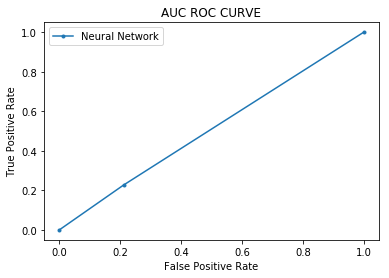

In [71]:
import matplotlib.pyplot as plt

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.plot(cr_fpr, cr_tpr, linestyle='--',linewidth=3, label='CRIB')
#plt.plot(cr2_fpr, cr2_tpr, 'r+',linestyle='--', label='CRIB II')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='SNAPPE II')
#plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='SNAP II')
#plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.legend(loc=0)
#plt.savefig('AUC_2.png',dpi=1200)

In [72]:
roc_auc_score(snap_2.true_outcome,snap_2.pred)

0.5079038795599305

In [73]:
ds = pd.DataFrame(snap_2.pred)

In [74]:
ds['true_outcome'] = snap_2.true_outcome

In [75]:
ds.to_csv('snap_2_10_Jan.csv')

In [65]:
snappe = data.copy()

In [66]:
cols_snappe = ['uhid', 'dischargestatus', 'birthweight', 
       'weight_galevel', 'central_temp', 'bp_mean', 'admissionweight',
       'new_ph', 'apgar_fivemin', 'po2_fio2_ratio',
       'urine_output']

In [67]:
snappe = snappe[cols_snappe]

In [72]:
snappe.to_csv('snappe_2.csv')

In [70]:
dh = pd.DataFrame(columns=snappe.columns)
for i in uhid:
    x = snappe[snappe['uhid']==i]
    dh = dh.append(x,ignore_index=True)

In [71]:
snappe = dh.copy()

In [81]:
snappe['score'] = snappe.bp_mean.apply(mean_bp) + snappe.central_temp.apply(temp) + snappe.po2_fio2_ratio.apply(po2_fio2) + snappe.new_ph.apply(ph_calc)+snappe.urine_output.apply(urine_output_calc)+snappe.apgar_fivemin.apply(apgar)+snappe.birthweight.apply(birthweight_calc)+snappe.weight_galevel.apply(sga_calc)

In [82]:
def snappe_pred(x):
    if x>5:
        return 1
    else:
        return 0

In [83]:
snappe['pred'] = snappe['score'].apply(snappe_pred)
snappe['true_outcome'] = snappe['dischargestatus'].apply(bina)

In [84]:
snappe_fpr, snappe_tpr, _ = roc_curve(snappe.true_outcome,snappe.pred,drop_intermediate=False)

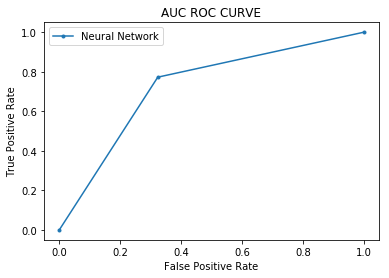

In [85]:
import matplotlib.pyplot as plt

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.plot(cr_fpr, cr_tpr, linestyle='--',linewidth=3, label='CRIB')
#plt.plot(cr2_fpr, cr2_tpr, 'r+',linestyle='--', label='CRIB II')
plt.plot(snappe_fpr, snappe_tpr, marker='.', label='Neural Network')
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='SNAPPE II')
#plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='SNAP II')
#plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.legend(loc=0)
#plt.savefig('AUC_2.png',dpi=1200)

In [86]:
roc_auc_score(snappe.true_outcome,snappe.pred)

0.7245801968731906

In [87]:
snap = pd.DataFrame(snap_2.true_outcome)

In [88]:
snap['pred'] = snap_2.pred

In [89]:
snap.to_csv('snap_2_auc_roc_new.csv')

In [90]:
snappe_2 = pd.DataFrame(snappe.true_outcome)

In [91]:
snappe_2['pred'] = snappe.pred

In [92]:
snappe_2.to_csv('snappe_2_AUC_ROC_new.csv')

In [90]:
#reports
#Results might vary with each iteration as Deep Neural Networks,initially assigns random weights.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(snappe.true_outcome,snappe.pred))
print(confusion_matrix(snappe.true_outcome,snappe.pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      1570
           1       0.03      0.77      0.06        22

   micro avg       0.68      0.68      0.68      1592
   macro avg       0.51      0.72      0.43      1592
weighted avg       0.98      0.68      0.80      1592

[[1062  508]
 [   5   17]]


In [91]:
print(classification_report(snap_2.true_outcome,snap_2.pred))
print(confusion_matrix(snap_2.true_outcome,snap_2.pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1570
           1       0.01      0.23      0.03        22

   micro avg       0.78      0.78      0.78      1592
   macro avg       0.50      0.51      0.45      1592
weighted avg       0.97      0.78      0.86      1592

[[1238  332]
 [  17    5]]


In [109]:
dt = pd.DataFrame(snappe.pred)
dt['true_outcome'] = snap_2.true_outcome

In [ ]:
#dt.to_csv('snappe_10_jan.csv')

In [ ]:
#snappe.to_csv('SNAPPE_2_10_jan_2020.csv')

In [ ]:
#data.to_csv('SNAPPE_2_10_jan_2020.csv')

In [ ]:
dg = pd.DataFrame(columns=data.columns)

In [ ]:
for i in uhid:
    x = data[data['uhid']==i]
    dg = dg.append(x,ignore_index=True)

In [ ]:
#dg.to_csv('SNAPPE_final.csv')

In [92]:
len(uhid)

1693